In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
# close all figures
plt.close('all')

# Filter visualization

In [13]:
data_dir = 'PCA_then_ICA'

# mixing_matrix_high_tol = np.load(data_dir + "/mixing_matrix_picard_tol_1e-12_unit_var.npy")
# ic_components_high_tol = np.load(data_dir + "/ica_components_picard_tol_1e-12_unit_var.npy")
# whitening_matrix_high_tol = np.load(data_dir + "/whitening_matrix_picard_tol_1e-12_unit_var.npy")
# mean_high_tol = np.load(data_dir + "/ica_mean_picard_tol_1e-12_unit_var.npy")

mixing_matrix_high_tol = np.load(data_dir + "/mixing_matrix_FastICA.npy")
ic_components_high_tol = np.load(data_dir + "/ica_components_FastICA.npy")
whitening_matrix_high_tol = np.load(data_dir + "/whitening_matrix_FastICA.npy")
mean_high_tol = np.load(data_dir + "/ica_mean_FastICA.npy")


In [14]:
# set any values below threshold to zero
threshold = .001
ic_components_high_tol[np.abs(ic_components_high_tol) < threshold] = 0

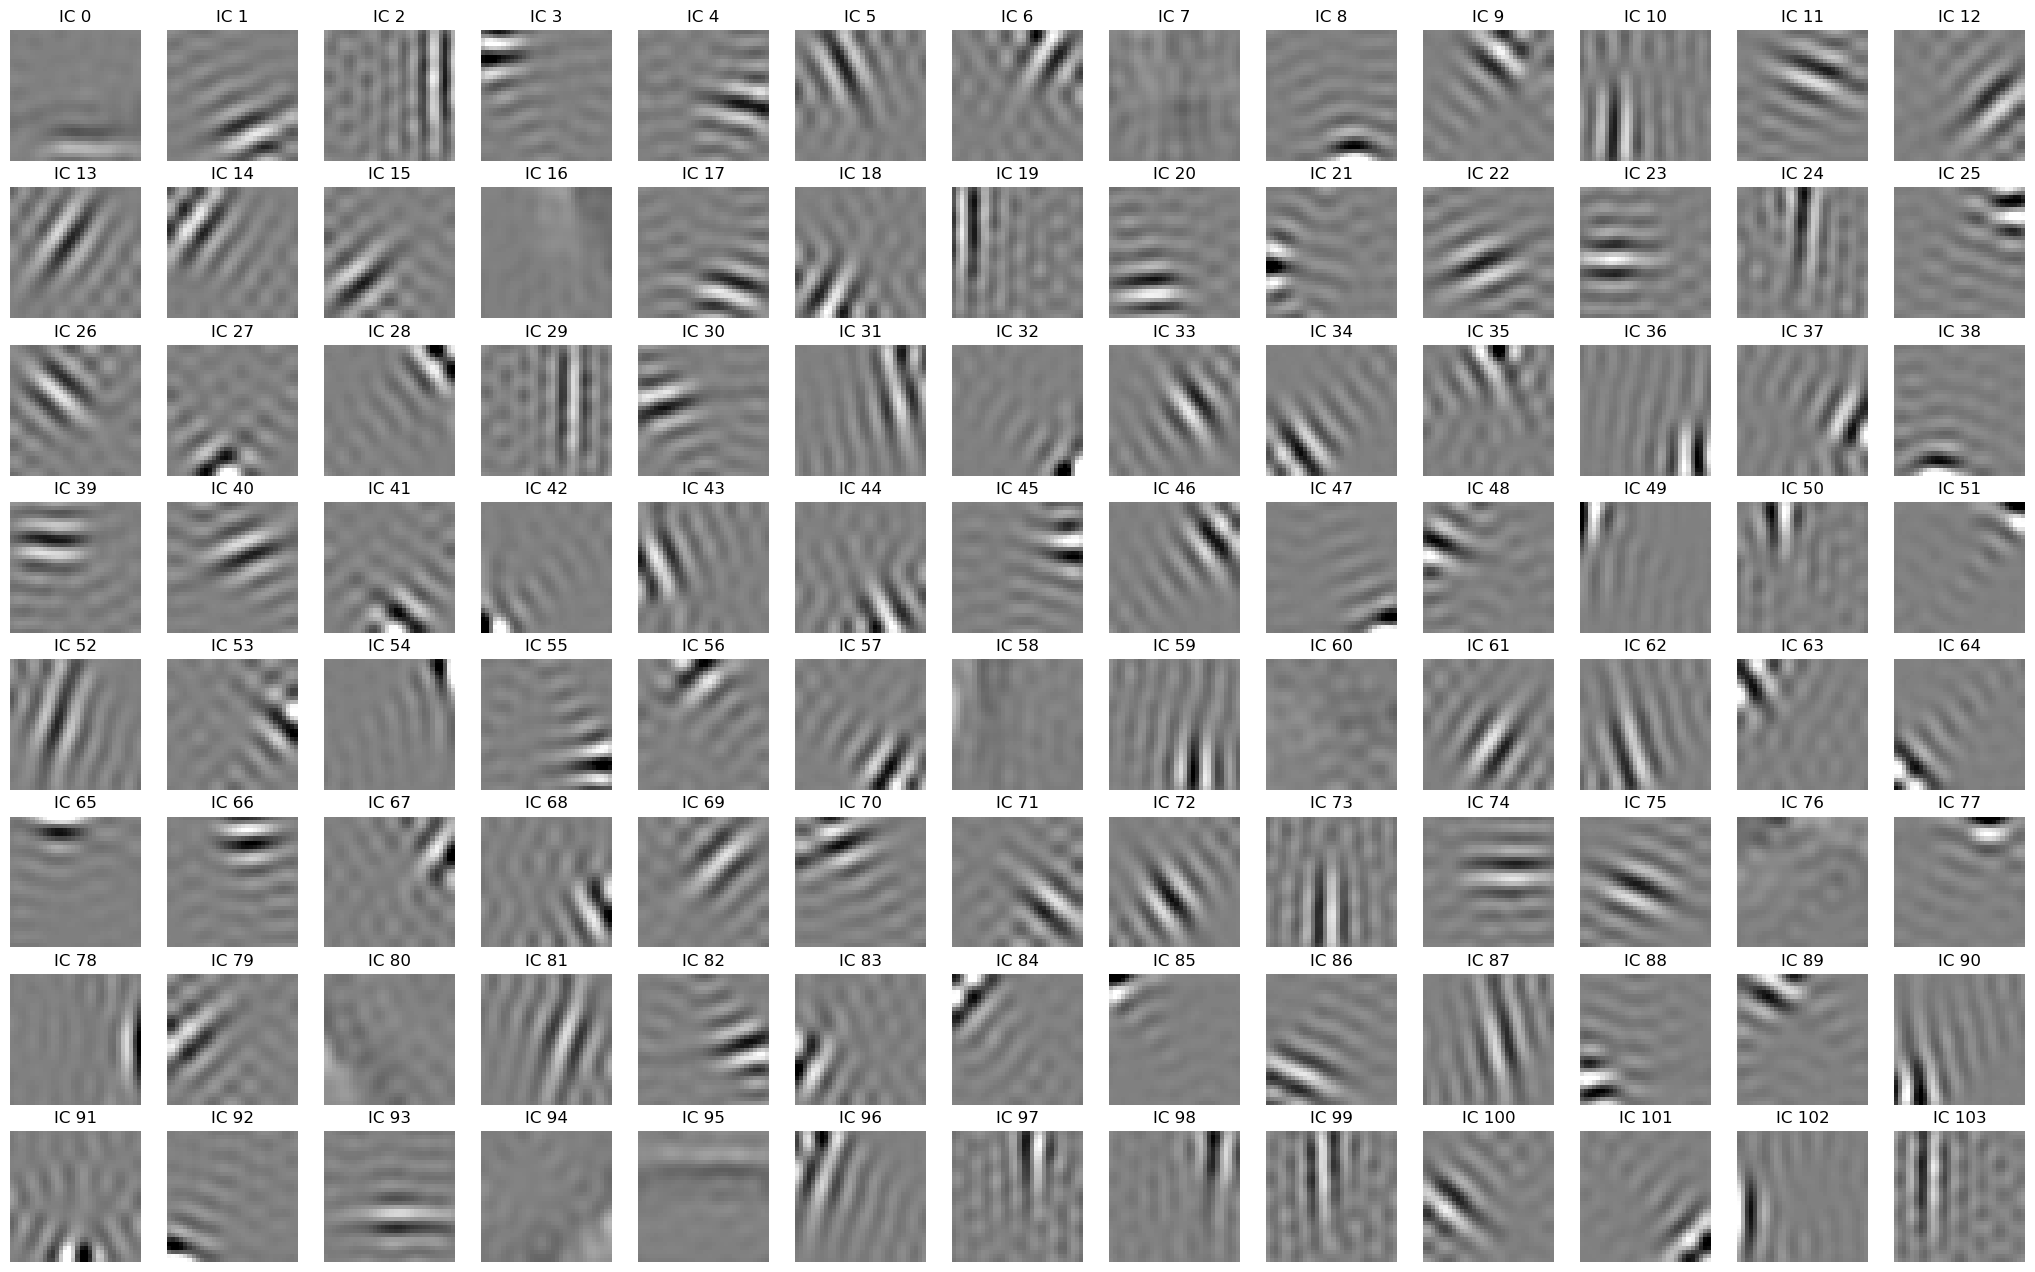

In [15]:
import matplotlib.colors as mcolors

norm = mcolors.CenteredNorm(halfrange=.1)
# norm = mcolors.TwoSlopeNorm(vcenter=0, vmin=-.1, vmax=.1)

fig, ax = plt.subplots(8, 13, figsize=(2*13, 2*8))

# honeycombs are 9, 42, 80, 88

for i in range(104):
    ax[i//13, i%13].imshow(ic_components_high_tol[i, :].reshape(32, 32), cmap='gray', norm=norm)
    ax[i//13, i%13].set_title(f"IC {i}")
    # remove axis
    ax[i//13, i%13].axis('off')
# save as svg
plt.savefig('ICA_components_FastICA.pdf', format='pdf')

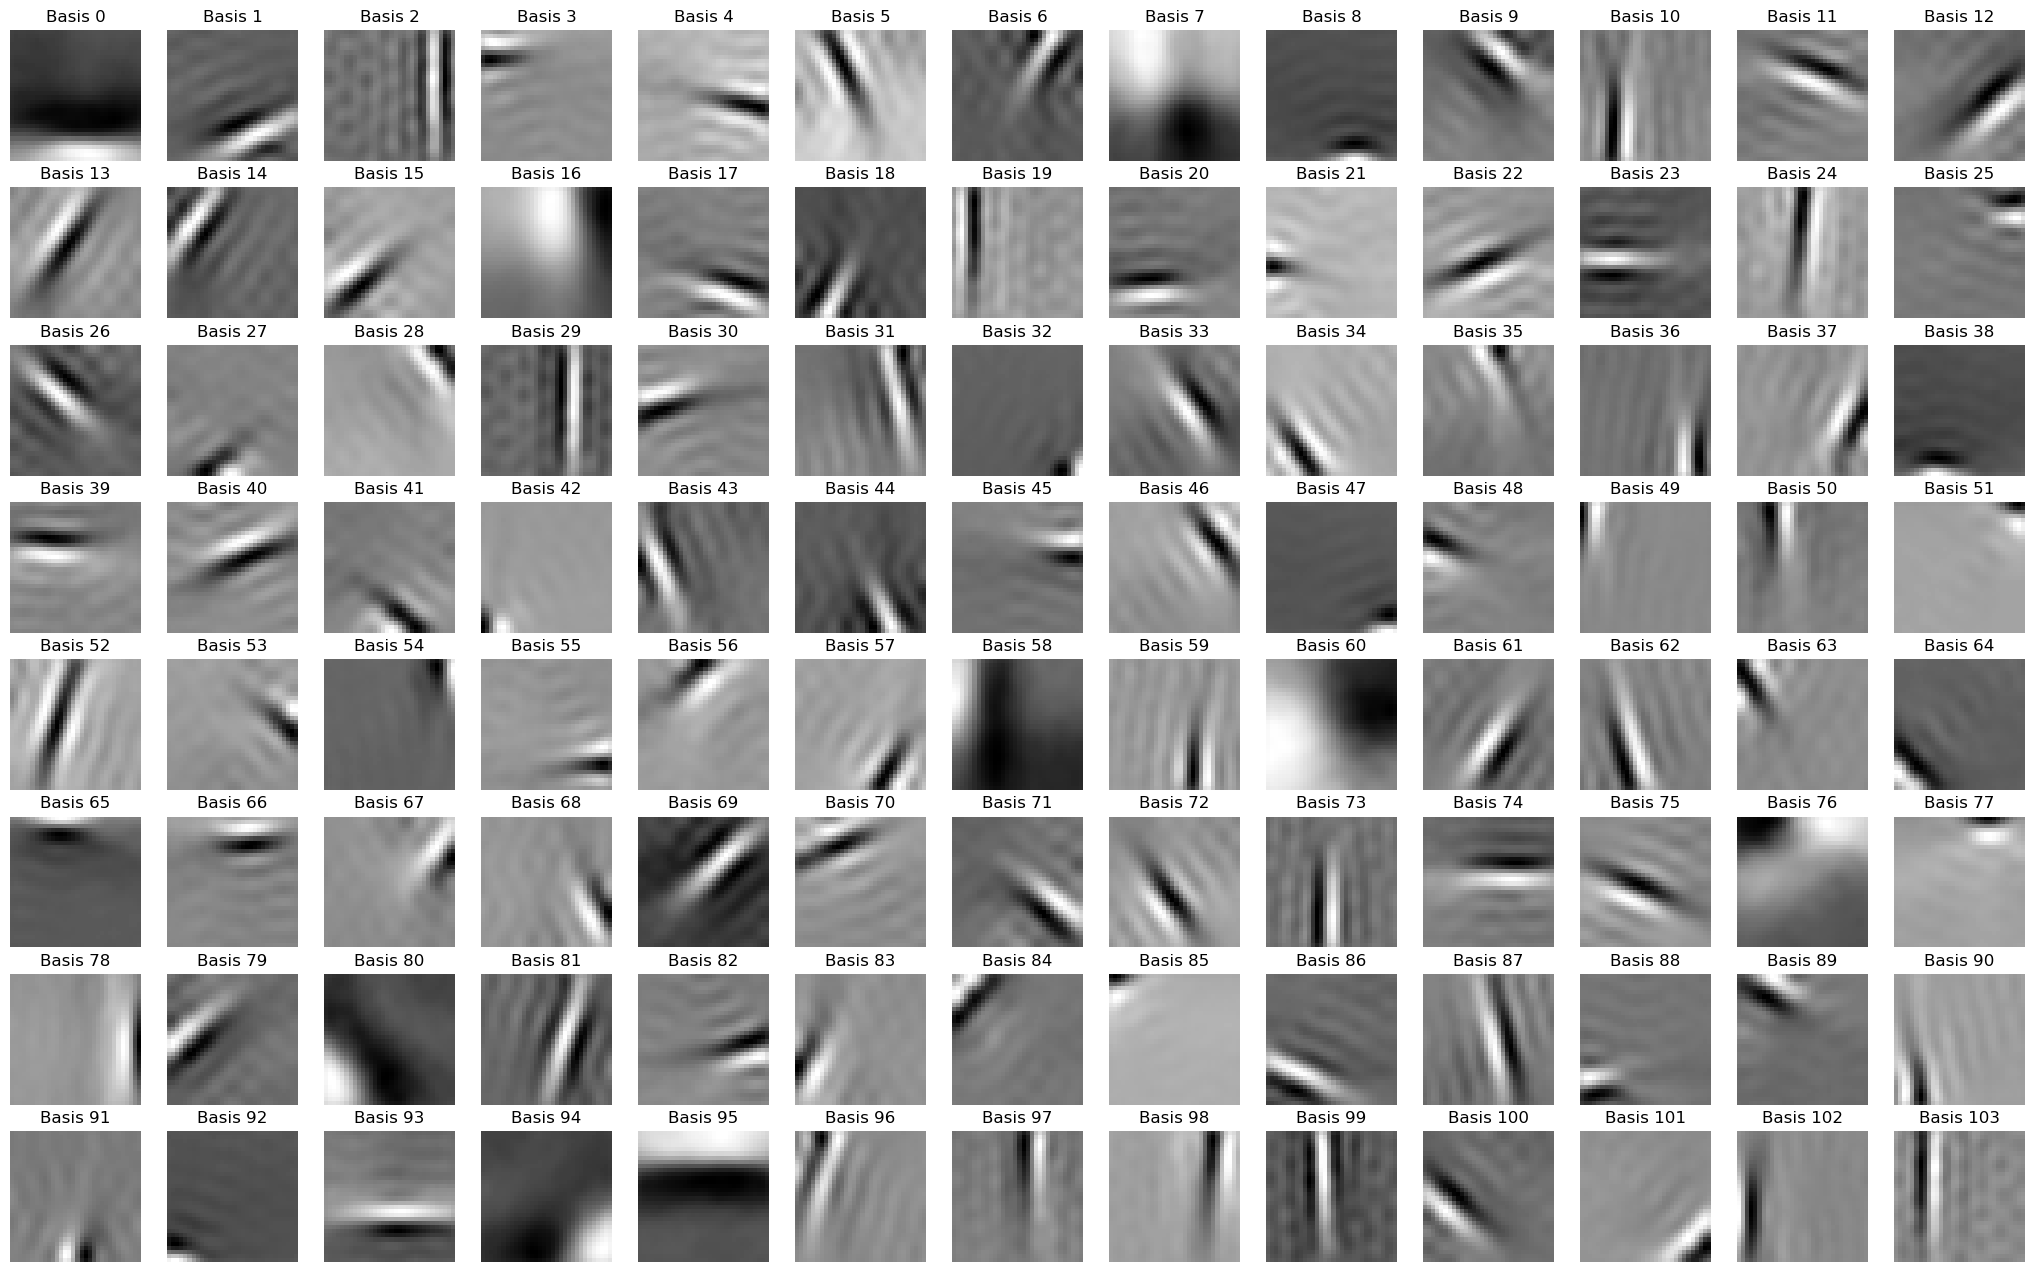

In [16]:
fig, ax = plt.subplots(8, 13, figsize=(2*13, 2*8))

for i in range(104):
    ax[i//13, i%13].imshow(mixing_matrix_high_tol[:, i].reshape(32, 32), cmap='gray')
    ax[i//13, i%13].set_title(f"Basis {i}")
    # remove axis
    ax[i//13, i%13].axis('off')

# Analysis of responses

In [ ]:
data_dir = 'PCA_then_ICA' # 1024 patches per video, 20000 iterations

stationary_responses_nonrandom = np.load(data_dir + "/stationary_responses_nonrandom_multi_dist_FastICA.npy")
moving_responses_nonrandom = np.load(data_dir + "/moving_responses_nonrandom_multi_dist_FastICA.npy")

In [25]:
moving_responses_nonrandom.shape

(104, 4, 91943)

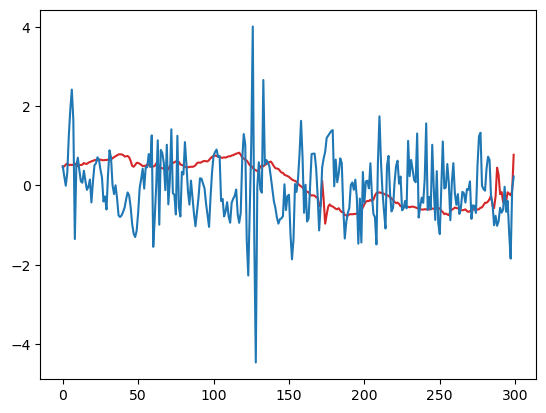

In [19]:
plt.plot(stationary_responses_nonrandom[2, 0, :300], color='tab:red')
plt.plot(moving_responses_nonrandom[2, 0, :300], color='tab:blue')

## Visualize correlations between filter pairs

In [20]:
tau = 150

# split the responses into chunks of size tau and compute the correlation matrix

stationary_responses_nonrandom_split = np.split(stationary_responses_nonrandom[:, 0, :stationary_responses_nonrandom.shape[2]//tau*tau], stationary_responses_nonrandom.shape[2]//tau, axis=1)
stationary_responses_nonrandom_split = np.array(stationary_responses_nonrandom_split)
moving_responses_nonrandom_split = np.split(moving_responses_nonrandom[:, 0, :moving_responses_nonrandom.shape[2]//tau*tau], moving_responses_nonrandom.shape[2]//tau, axis=1)
moving_responses_nonrandom_split = np.array(moving_responses_nonrandom_split)

In [10]:
stationary_responses_nonrandom_split.shape

(610, 104, 150)

In [29]:
# compute the correlation between filters 77 and 55 in each window
stationary_corrleation_arr_77_55 = []
stationary_correlation_arr_28_77 = []
stationary_correlation_arr_55_28 = []
moving_correlation_arr_77_55 = []
moving_correlation_arr_28_77 = []
moving_correlationn_55_28 = []
for i in range(stationary_responses_nonrandom_split.shape[0]):
    corr_77_55 = np.corrcoef(stationary_responses_nonrandom_split[i, 77, :], stationary_responses_nonrandom_split[i, 55, :])
    stationary_corrleation_arr_77_55.append(corr_77_55[0, 1])
    corr_28_77 = np.corrcoef(stationary_responses_nonrandom_split[i, 28, :], stationary_responses_nonrandom_split[i, 77, :])
    stationary_correlation_arr_28_77.append(corr_28_77[0, 1])
    corr_55_28 = np.corrcoef(stationary_responses_nonrandom_split[i, 55, :], stationary_responses_nonrandom_split[i, 28, :])
    stationary_correlation_arr_55_28.append(corr_55_28[0, 1])
for i in range(moving_responses_nonrandom_split.shape[0]):
    corr_77_55 = np.corrcoef(moving_responses_nonrandom_split[i, 77, :], moving_responses_nonrandom_split[i, 55, :])
    moving_correlation_arr_77_55.append(corr_77_55[0, 1])
    corr_28_77 = np.corrcoef(moving_responses_nonrandom_split[i, 28, :], moving_responses_nonrandom_split[i, 77, :])
    moving_correlation_arr_28_77.append(corr_28_77[0, 1])
    corr_55_28 = np.corrcoef(moving_responses_nonrandom_split[i, 55, :], moving_responses_nonrandom_split[i, 28, :])
    moving_correlationn_55_28.append(corr_55_28[0, 1])

In [31]:
stationary_corrleation_arr_77_55 = np.array(stationary_corrleation_arr_77_55)
stationary_correlation_arr_28_77 = np.array(stationary_correlation_arr_28_77)
stationary_correlation_arr_55_28 = np.array(stationary_correlation_arr_55_28)
# max_idx_77_55 = np.argmax(stationary_corrleation_arr_77_55)
# max_idx_28_77 = np.argmax(stationary_correlation_arr_28_77)
# max_idx_55_28 = np.argmax(stationary_correlation_arr_55_28)
moving_correlation_arr_28_77 = np.array(moving_correlation_arr_28_77)
moving_correlation_arr_77_55 = np.array(moving_correlation_arr_77_55)
moving_correlationn_55_28 = np.array(moving_correlationn_55_28)

In [33]:
# find where the difference between the absolute value of the correlation between the moving and stationary responses is maximum
diff_28_77 = np.abs(stationary_correlation_arr_28_77) - np.abs(moving_correlation_arr_28_77[:610])
max_diff_idx_28_77 = np.argmax(diff_28_77)

-0.8898355453441527


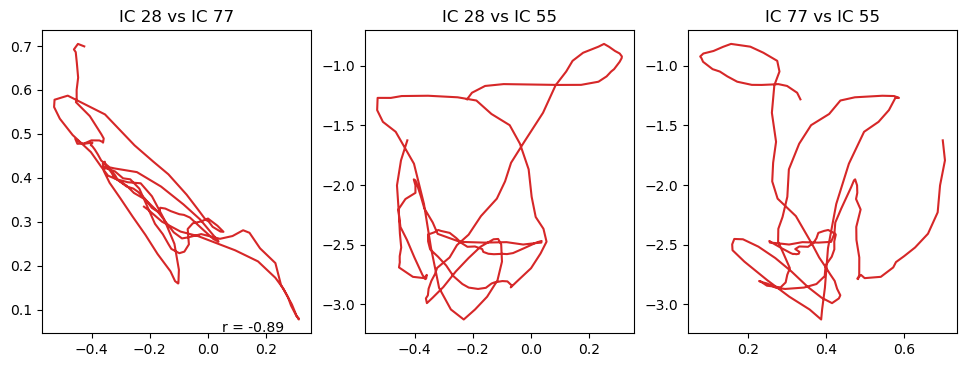

In [ ]:
# example indices
example_idx = [77, 28, 55] # [61, 22, 81]

time_idx = max_diff_idx_28_77

cm = 1/2.54  # centimeters in inches

fig, ax = plt.subplots(1, 3, figsize=(3*10*cm, 10*cm))

ax[0].plot(stationary_responses_nonrandom_split[time_idx, example_idx[0], :], stationary_responses_nonrandom_split[time_idx, example_idx[1], :], color='tab:red')
ax[1].plot(stationary_responses_nonrandom_split[time_idx, example_idx[0], :], stationary_responses_nonrandom_split[time_idx, example_idx[2], :], color='tab:red')
ax[2].plot(stationary_responses_nonrandom_split[time_idx, example_idx[1], :], stationary_responses_nonrandom_split[time_idx, example_idx[2], :], color='tab:red')
ax[0].set_title(f"IC {example_idx[0]} vs IC {example_idx[1]}")
ax[1].set_title(f"IC {example_idx[0]} vs IC {example_idx[2]}")
ax[2].set_title(f"IC {example_idx[1]} vs IC {example_idx[2]}")
# remove the axis ticks
# ax[0].get_xaxis().set_ticks([])
# ax[1].get_xaxis().set_ticks([])
# ax[2].get_xaxis().set_ticks([])
# ax[0].get_yaxis().set_ticks([])
# ax[1].get_yaxis().set_ticks([])
# ax[2].get_yaxis().set_ticks([])
plt.savefig('../cosyne_2025_figures/stationary_pairwise_correlations.svg', format='svg')

-0.8898355453441527


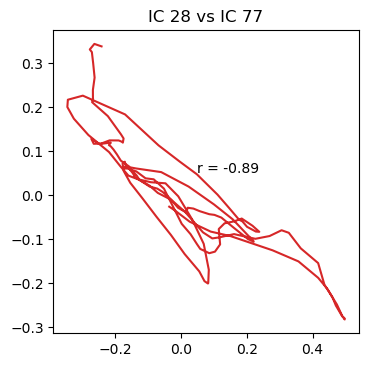

In [45]:
# example indices
example_idx = [28, 77]

time_idx = max_diff_idx_28_77

cm = 1/2.54  # centimeters in inches

fig, ax = plt.subplots(1, 1, figsize=(10*cm, 10*cm))

ax.plot(stationary_responses_nonrandom_split[time_idx, example_idx[0], :]-np.mean(stationary_responses_nonrandom_split[time_idx, example_idx[0], :]), stationary_responses_nonrandom_split[time_idx, example_idx[1], :]-np.mean(stationary_responses_nonrandom_split[time_idx, example_idx[1], :]), color='tab:red')
ax.set_title(f"IC {example_idx[0]} vs IC {example_idx[1]}")
print(stationary_correlation_arr_28_77[time_idx])
# also print this in the plot
ax.text(0.05, 0.05, f"r = {stationary_correlation_arr_28_77[time_idx]:.2f}")
# remove the axis ticks
# ax[0].get_xaxis().set_ticks([])
# ax[1].get_xaxis().set_ticks([])
# ax[2].get_xaxis().set_ticks([])
# ax[0].get_yaxis().set_ticks([])
# ax[1].get_yaxis().set_ticks([])
# ax[2].get_yaxis().set_ticks([])-np.mean()
plt.savefig('../manuscript_figures/fig4_stationary_pairwise_correlations.pdf', format='pdf', bbox_inches='tight')

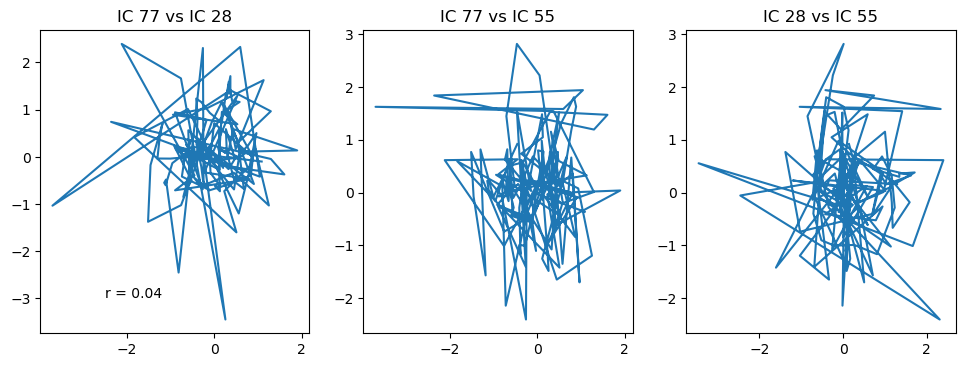

In [ ]:
# example indices
# example_idx = [61, 22, 81]

cm = 1/2.54  # centimeters in inches
# time_idx = 4

fig, ax = plt.subplots(1, 3, figsize=(3*10*cm, 10*cm))

ax[0].plot(moving_responses_nonrandom_split[time_idx, example_idx[0], :], moving_responses_nonrandom_split[time_idx, example_idx[1], :], color='tab:blue')
ax[1].plot(moving_responses_nonrandom_split[time_idx, example_idx[0], :], moving_responses_nonrandom_split[time_idx, example_idx[2], :], color='tab:blue')
ax[2].plot(moving_responses_nonrandom_split[time_idx, example_idx[1], :], moving_responses_nonrandom_split[time_idx, example_idx[2], :], color='tab:blue')
ax[0].set_title(f"IC {example_idx[0]} vs IC {example_idx[1]}")
ax[1].set_title(f"IC {example_idx[0]} vs IC {example_idx[2]}")
ax[2].set_title(f"IC {example_idx[1]} vs IC {example_idx[2]}")
# remove the axis ticks
# ax[0].get_xaxis().set_ticks([])
# ax[1].get_xaxis().set_ticks([])
# ax[2].get_xaxis().set_ticks([])
# ax[0].get_yaxis().set_ticks([])
# ax[1].get_yaxis().set_ticks([])
# ax[2].get_yaxis().set_ticks([])
plt.savefig('../cosyne_2025_figures/moving_pairwise_correlations.svg', format='svg')

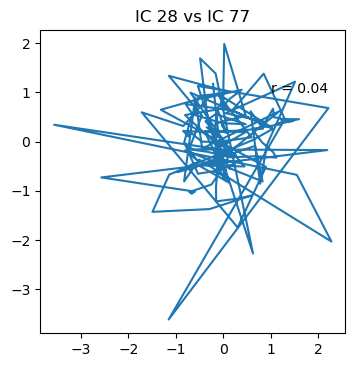

In [46]:
# example indices
# example_idx = [61, 22, 81]

cm = 1/2.54  # centimeters in inches
# time_idx = 4

fig, ax = plt.subplots(1, 1, figsize=(10*cm, 10*cm))

ax.plot(moving_responses_nonrandom_split[time_idx, example_idx[0], :]-np.mean(moving_responses_nonrandom_split[time_idx, example_idx[0], :]), moving_responses_nonrandom_split[time_idx, example_idx[1], :]-np.mean(moving_responses_nonrandom_split[time_idx, example_idx[1], :]), color='tab:blue')
ax.set_title(f"IC {example_idx[0]} vs IC {example_idx[1]}")
# print the correlation in the plot
ax.text(1, 1, f"r = {moving_correlation_arr_28_77[time_idx]:.2f}")
# remove the axis ticks
# ax[0].get_xaxis().set_ticks([])
# ax[1].get_xaxis().set_ticks([])
# ax[2].get_xaxis().set_ticks([])
# ax[0].get_yaxis().set_ticks([])
# ax[1].get_yaxis().set_ticks([])
# ax[2].get_yaxis().set_ticks([])
plt.savefig('../manuscript_figures/fig4_moving_pairwise_correlations.pdf', format='pdf', bbox_inches='tight')
# plt.savefig('../cosyne_2025_figures/moving_pairwise_correlations.svg', format='svg')

### Video version

In [ ]:
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
import matplotlib.pyplot as plt

fps = 30

def plot_stimulus_movie(stim_x, stim_y, c):
    fig, ax = plt.subplots(1, 1, figsize=(10*cm, 10*cm))
    # make the white border black
    fig.patch.set_edgecolor('black')
    # set the background to be black
    fig.patch.set_facecolor('black')
    # set the background to be black
    ax.set_facecolor('black')
    # set the border to be black
    # plot the stimulus
    # draw a rectangle where the filter is applied
    ax.plot(stim_x, stim_y, color=c, linewidth=4)
    # ax.set_ylim(-.5, .8)
    # for 77 and 28
    # ax.set_xlim(-.8, 0)
    # ax.set_ylim(-.6, .9)
    # for 28 and 55
    ax.set_ylim(-4, 1)
    ax.set_xlim(-.6, .9)
    # for 55 and 77
    # ax.set_ylim(-.8, 0)
    # ax.set_xlim(-4, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    # remvoe top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # set the bottom and left spines to be white
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    # make bottom and left splines thicker
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['left'].set_linewidth(4)
    return fig, ax

def make_frame(t):
    length = int(t*fps)
    fig, ax = plot_stimulus_movie(stationary_responses_nonrandom_split[time_idx, example_idx[1], :length], stationary_responses_nonrandom_split[time_idx, example_idx[2], :length], c='tab:red')
    image = mplfig_to_npimage(fig)
    plt.close(fig)  # Close the figure to prevent displaying individual frames
    return image

T = 5

animation = VideoClip(make_frame, duration=T)

# animation.ipython_display(fps=100, loop=True, autoplay=True)
animation.write_videofile('stationary_filter_pair_28_55.MP4', fps=fps, codec='mpeg4')

Moviepy - Building video stationary_filter_pair_28_55.MP4.
Moviepy - Writing video stationary_filter_pair_28_55.MP4



t:   0%|          | 0/150 [00:00<?, ?it/s, now=None]

Moviepy - Done !
Moviepy - video ready stationary_filter_pair_28_55.MP4


In [83]:
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
import matplotlib.pyplot as plt

fps = 30

def plot_stimulus_movie(stim_x, stim_y, c):
    fig, ax = plt.subplots(1, 1, figsize=(10*cm, 10*cm))
    # make the white border black
    fig.patch.set_edgecolor('black')
    # set the background to be black
    fig.patch.set_facecolor('black')
    # set the background to be black
    ax.set_facecolor('black')
    # set the border to be black
    # plot the stimulus
    # draw a rectangle where the filter is applied
    ax.plot(stim_x, stim_y, color=c, linewidth=4)
    # ax.set_ylim(-.5, .8)
    # for 77 and 28
    # ax.set_xlim(-3, 1)
    # ax.set_ylim(-1.2, 1.6)
    # for 28 and 55
    # ax.set_ylim(-3, 2)
    # ax.set_xlim(-1.2, 1.6)
    # for 55 and 77
    ax.set_ylim(-3, 1)
    ax.set_xlim(-3, 2)
    ax.set_xticks([])
    ax.set_yticks([])
    # remvoe top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # set the bottom and left spines to be white
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    # make bottom and left splines thicker
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['left'].set_linewidth(4)
    return fig, ax

def make_frame(t):
    length = int(t*fps)
    fig, ax = plot_stimulus_movie(moving_responses_nonrandom_split[time_idx, example_idx[2], :length], moving_responses_nonrandom_split[time_idx, example_idx[0], :length], c='tab:blue')
    image = mplfig_to_npimage(fig)
    plt.close(fig)  # Close the figure to prevent displaying individual frames
    return image

T = 5

animation = VideoClip(make_frame, duration=T)

# animation.ipython_display(fps=100, loop=True, autoplay=True)
animation.write_videofile('moving_filter_pair_55_77.MP4', fps=fps, codec='mpeg4')

Moviepy - Building video moving_filter_pair_55_77.MP4.
Moviepy - Writing video moving_filter_pair_55_77.MP4



t:   0%|          | 0/150 [00:00<?, ?it/s, now=None]

Moviepy - Done !
Moviepy - video ready moving_filter_pair_55_77.MP4


# Decorrelation (PyTorch) on the absolute value of filter outputs

### PyTorch optimization, all filters

In [ ]:
import torch
from tqdm import tqdm
import numpy as np
from joblib import Parallel, delayed
from torch.optim import Adam

# now let's do this for a number of filters for a certain number of randomly drawn windows
num_windows = 1000
num_filters = 100
num_neighbors = 100
window_size = 150  # Assuming window_size is defined somewhere
num_epochs = 500  # Reduced the number of epochs for faster optimization
learning_rate = 0.005
reg_lmbd = 0.1


# define the loss function as the mean pearson correlation (use torch.corrcoef) between the residuals and the neighbors
def loss_fn(neighbors, ref, weights, reg_lmbd=0.01):
    residuals = ref - torch.matmul(neighbors, weights)
    
    # Stack the residuals and neighbors
    stacked = torch.cat([residuals, neighbors], dim=1).T

    # compute the correlation
    correlation_matrix = torch.corrcoef(stacked)
    
    # Extract the correlations with the new reference response
    correlations = torch.abs(correlation_matrix[0, 1:])
    
    # Compute the mean correlation
    mean_correlation = correlations.mean()

    # compute the L1 norm of the weights
    # weight_norm = torch.norm(weights, p=1)
    # compute the L2 norm of the weights
    weight_norm = torch.norm(weights, p=2)

    return mean_correlation + reg_lmbd*weight_norm

def process_filter_window(filt_idx, j):
    start_idx = np.random.randint(0, stationary_responses_nonrandom.shape[2] - window_size)
    end_idx = start_idx + window_size

    neighbors_moving = np.delete(moving_responses_nonrandom[:num_neighbors+1, 0, start_idx:end_idx], filt_idx, axis=0)
    neighbors_stationary = np.delete(stationary_responses_nonrandom[:num_neighbors+1, 0, start_idx:end_idx], filt_idx, axis=0)
    ref_moving = moving_responses_nonrandom[filt_idx, 0, start_idx:end_idx]
    ref_stationary = stationary_responses_nonrandom[filt_idx, 0, start_idx:end_idx]

    # subtract the mean
    neighbors_moving = neighbors_moving - np.mean(neighbors_moving, axis=1)[:, np.newaxis]
    neighbors_stationary = neighbors_stationary - np.mean(neighbors_stationary, axis=1)[:, np.newaxis]
    ref_moving = ref_moving - np.mean(ref_moving)
    ref_stationary = ref_stationary - np.mean(ref_stationary)

    # apply relu
    neighbors_moving = np.maximum(neighbors_moving, 0)
    neighbors_stationary = np.maximum(neighbors_stationary, 0)
    ref_moving = np.maximum(ref_moving, 0)
    ref_stationary = np.maximum(ref_stationary, 0)

    # take absolute value of everything
    # neighbors_moving = np.abs(neighbors_moving)
    # neighbors_stationary = np.abs(neighbors_stationary)
    # ref_moving = np.abs(ref_moving)
    # ref_stationary = np.abs(ref_stationary)

    # Compute the correlation between the ref and neighbors
    correlation_moving = np.array([np.corrcoef(neighbors_moving[k, :], ref_moving)[0, 1] for k in range(100)])
    correlation_stationary = np.array([np.corrcoef(neighbors_stationary[k, :], ref_stationary)[0, 1] for k in range(100)])

    # optimize weights using PyTorch and gradient based methods
    # convert the data to torch tensors
    neighbors_moving = torch.tensor(neighbors_moving, dtype=torch.float32).T
    neighbors_stationary = torch.tensor(neighbors_stationary, dtype=torch.float32).T
    ref_moving = torch.tensor(ref_moving, dtype=torch.float32).view(-1, 1)
    ref_stationary = torch.tensor(ref_stationary, dtype=torch.float32).view(-1, 1)

    # guess randomly the weights for the moving and stationary case between 0 and 1
    moving_weights = torch.rand(neighbors_moving.shape[1], 1, dtype=torch.float32, requires_grad=True)
    stationary_weights = torch.rand(neighbors_stationary.shape[1], 1, dtype=torch.float32, requires_grad=True)

    # define the optimizer
    optimizer_moving = Adam([moving_weights], lr=learning_rate)
    optimizer_stationary = Adam([stationary_weights], lr=learning_rate)

    loss_history_moving = []
    weight_history_moving = []
    loss_history_stationary = []
    weight_history_stationary = []

    # run the optimization
    for i in range(num_epochs):
        # zero grad from previous iteration
        optimizer_moving.zero_grad()
        optimizer_stationary.zero_grad()
        # store the weights
        weight_history_moving.append(moving_weights.clone().detach().cpu().numpy())
        weight_history_stationary.append(stationary_weights.clone().detach().cpu().numpy())
        # compute and store the loss
        loss_moving = loss_fn(neighbors_moving, ref_moving, moving_weights, reg_lmbd=reg_lmbd)
        loss_history_moving.append(loss_moving.item())
        loss_stationary = loss_fn(neighbors_stationary, ref_stationary, stationary_weights, reg_lmbd=reg_lmbd)
        loss_history_stationary.append(loss_stationary.item())
        if i < num_epochs - 1:
            # backpropagate
            loss_moving.backward()
            loss_stationary.backward()
            # update weights
            optimizer_moving.step()
            optimizer_stationary.step()
            # Enforce positive weights
            with torch.no_grad():
                moving_weights.data = torch.relu(moving_weights.data)
                stationary_weights.data = torch.relu(stationary_weights.data)

    # cast the history to numpy arrays
    weight_history_moving = np.array(weight_history_moving)
    weight_history_stationary = np.array(weight_history_stationary)
    loss_history_moving = np.array(loss_history_moving)
    loss_history_stationary = np.array(loss_history_stationary)

    # Compute the residuals
    residuals_moving = ref_moving - torch.matmul(neighbors_moving, moving_weights)
    residuals_stationary = ref_stationary - torch.matmul(neighbors_stationary, stationary_weights)

    # Convert residuals to numpy arrays
    residuals_moving = residuals_moving.detach().cpu().numpy()
    residuals_stationary = residuals_stationary.detach().cpu().numpy()

    # Compute the correlation between the residuals and the neighbors
    correlation_moving_after = np.array([np.corrcoef(neighbors_moving[:, k].detach().cpu().numpy(), residuals_moving[:, 0])[0, 1] for k in range(100)])
    correlation_stationary_after = np.array([np.corrcoef(neighbors_stationary[:, k].detach().cpu().numpy(), residuals_stationary[:, 0])[0, 1] for k in range(100)])

    return (weight_history_moving, weight_history_stationary, loss_history_moving, loss_history_stationary, correlation_moving, correlation_stationary, correlation_moving_after, correlation_stationary_after, residuals_moving, residuals_stationary, start_idx)

results = Parallel(n_jobs=-1)(delayed(process_filter_window)(i, j) for i in tqdm(range(num_filters)) for j in range(num_windows))

In [ ]:
# make the arrays and unpack the results
weights_moving = np.zeros((num_filters, num_windows, num_epochs, 100, 1))
weights_stationary = np.zeros((num_filters, num_windows, num_epochs, 100, 1))
losses_moving = np.zeros((num_filters, num_windows, num_epochs))
losses_stationary = np.zeros((num_filters, num_windows, num_epochs))
correlation_moving = np.zeros((num_filters, num_windows, 100))
correlation_stationary = np.zeros((num_filters, num_windows, 100))
correlation_moving_after = np.zeros((num_filters, num_windows, 100))
correlation_stationary_after = np.zeros((num_filters, num_windows, 100))
residuals_moving_arr = np.zeros((num_filters, num_windows, window_size, 1))
residuals_stationary_arr = np.zeros((num_filters, num_windows, window_size, 1))
start_indices = np.zeros((num_filters, num_windows))

for i in range(num_filters):
    for j in range(num_windows):
        (weights_moving[i, j, :, :, :], weights_stationary[i, j, :, :, :], losses_moving[i, j, :], losses_stationary[i, j, :],
         correlation_moving[i, j, :], correlation_stationary[i, j, :], correlation_moving_after[i, j, :], correlation_stationary_after[i, j, :],
         residuals_moving_arr[i, j, :, :], residuals_stationary_arr[i, j, :, :], start_indices[i, j]) = results[i * num_windows + j]

In [1]:
# save everything in a directory called decorrelation_neighbors_pytorch
data_dir = f'decorrelation_neighbors_demean_relu_pytorch_l2_learning_rate_{learning_rate}_reg_lmbd_{reg_lmbd}_num_windows_{num_windows}_window_size_{window_size}'
# make the directory if it does not exist
import os
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
np.save(data_dir + '/weights_moving', weights_moving)
np.save(data_dir + '/weights_stationary', weights_stationary)
np.save(data_dir + '/losses_moving', losses_moving)
np.save(data_dir + '/losses_stationary', losses_stationary)
np.save(data_dir + '/correlation_moving', correlation_moving)
np.save(data_dir + '/correlation_stationary', correlation_stationary)
np.save(data_dir + '/correlation_moving_after', correlation_moving_after)
np.save(data_dir + '/correlation_stationary_after', correlation_stationary_after)
np.save(data_dir + '/residuals_moving', residuals_moving_arr)
np.save(data_dir + '/residuals_stationary', residuals_stationary_arr)
np.save(data_dir + '/start_indices', start_indices)


NameError: name 'learning_rate' is not defined

In [4]:
# load the data
learning_rate = 0.005
reg_lmbd = 0.1
num_windows = 1000
window_size = 150
data_dir = f'decorrelation_neighbors_FastICA_demean_relu_pytorch_l2_learning_rate_{learning_rate}_reg_lmbd_{reg_lmbd}_num_windows_{num_windows}_window_size_{window_size}'
weights_moving = np.load(data_dir + '/weights_moving.npy')
weights_stationary = np.load(data_dir + '/weights_stationary.npy')
# weights_moving_final = np.load(data_dir + '/weights_moving_final.npy')
# weights_stationary_final = np.load(data_dir + '/weights_stationary_final.npy')
# losses_moving = np.load(data_dir + '/losses_moving.npy')
# losses_stationary = np.load(data_dir + '/losses_stationary.npy')
correlation_moving = np.load(data_dir + '/correlation_moving.npy')
correlation_stationary = np.load(data_dir + '/correlation_stationary.npy')
correlation_moving_after = np.load(data_dir + '/correlation_moving_after.npy')
correlation_stationary_after = np.load(data_dir + '/correlation_stationary_after.npy')
# residuals_moving_arr = np.load(data_dir + '/residuals_moving.npy')
# residuals_stationary_arr = np.load(data_dir + '/residuals_stationary.npy')
start_indices = np.load(data_dir + '/start_indices.npy')

In [5]:
weights_moving_final = weights_moving[:, :, -1, :, :]
weights_stationary_final = weights_stationary[:, :, -1, :, :]
# save them
np.save(data_dir + '/weights_moving_final', weights_moving_final)
np.save(data_dir + '/weights_stationary_final', weights_stationary_final)

In [6]:
weights_moving_final.shape

(100, 1000, 100, 1)

In [ ]:
avg_weights_moving = np.nanmean(weights_moving_final, axis=1)
avg_weights_stationary = np.nanmean(weights_stationary_final, axis=1)

In [11]:
# compute the mean and std of the avg weights
mean_avg_weights_moving = np.nanmean(avg_weights_moving)
mean_avg_weights_stationary = np.nanmean(avg_weights_stationary)
std_avg_weights_moving = np.nanstd(avg_weights_moving)
std_avg_weights_stationary = np.nanstd(avg_weights_stationary)

In [14]:
# print the mean and std of the weights
print(f'stationary weight: {mean_avg_weights_stationary:.3f} +/- {std_avg_weights_stationary:.3f}')
print(f'moving weight: {mean_avg_weights_moving:.3f} +/- {std_avg_weights_moving:.3f}')

stationary weight: 0.028 +/- 0.005
moving weight: 0.012 +/- 0.003


In [16]:
# do a paired t-test on the weights
from scipy.stats import ttest_rel
t_stat, p_value = ttest_rel(avg_weights_moving.flatten(), avg_weights_stationary.flatten())
print(f't-statistic: {t_stat:.2f}, p-value: {p_value:.2e}')

t-statistic: -309.41, p-value: 0.00e+00


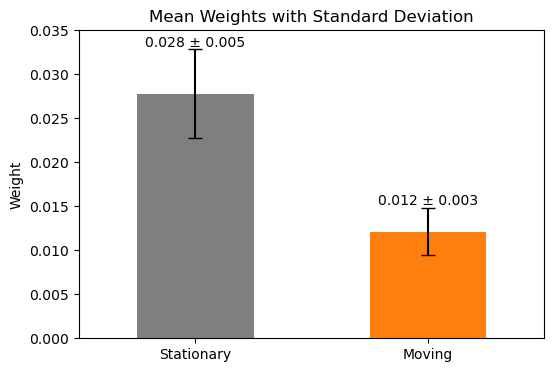

In [25]:
# plot the mean and std as bars with error bars
plt.figure(figsize=(6, 4))
p = plt.bar([1, 2], [mean_avg_weights_stationary, mean_avg_weights_moving], yerr=[std_avg_weights_stationary, std_avg_weights_moving], capsize=5, color=['tab:gray', 'tab:orange'], width=0.5)
# plot the mean and SD values as text above bar
plt.bar_label(p, [f'{mean_avg_weights_stationary:.3f} ± {std_avg_weights_stationary:.3f}', f'{mean_avg_weights_moving:.3f} ± {std_avg_weights_moving:.3f}'])
plt.xticks([1, 2], ['Stationary', 'Moving'])
plt.ylabel('Weight')
plt.title('Mean Weights with Standard Deviation')
plt.xlim(0.5, 2.5)
plt.ylim(0, 0.035)
plt.savefig('../manuscript_figures/fig4_weights_moving_stationary.pdf', format='pdf', bbox_inches='tight')

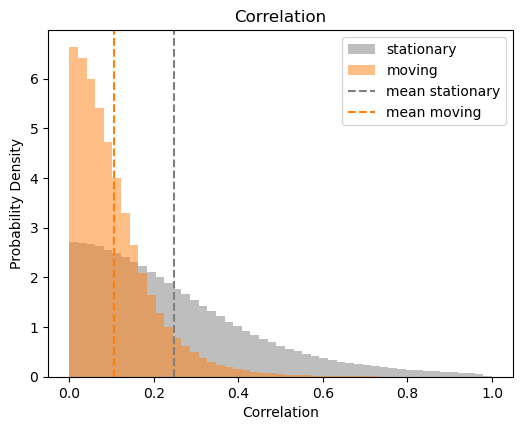

In [65]:
# plot the correlation before and after
fig, ax = plt.subplots(1, 1, figsize=(4*1.5, 3*1.5))

bins = np.linspace(0, 1, 50)

ax.hist(np.abs(correlation_stationary.flatten()), bins=bins, color='tab:gray', label='stationary',alpha=0.5, density=True)
ax.hist(np.abs(correlation_moving.flatten()), bins=bins, color='tab:orange', label='moving',alpha=0.5, density=True)
ax.set_title('Correlation')
# plot the average as a vertical line
ax.axvline(np.mean(np.abs(correlation_stationary.flatten())), color='tab:gray', linestyle='--', label='mean stationary')
ax.axvline(np.mean(np.abs(correlation_moving.flatten())), color='tab:orange', linestyle='--', label='mean moving')
# ax.set_yscale('log')
ax.legend()
ax.set_xlabel('Correlation')
ax.set_ylabel('Probability Density')
plt.savefig('../manuscript_figures/fig4_correlation_histogram.pdf', format='pdf', bbox_inches='tight')

Text(0, 0.5, 'Count')

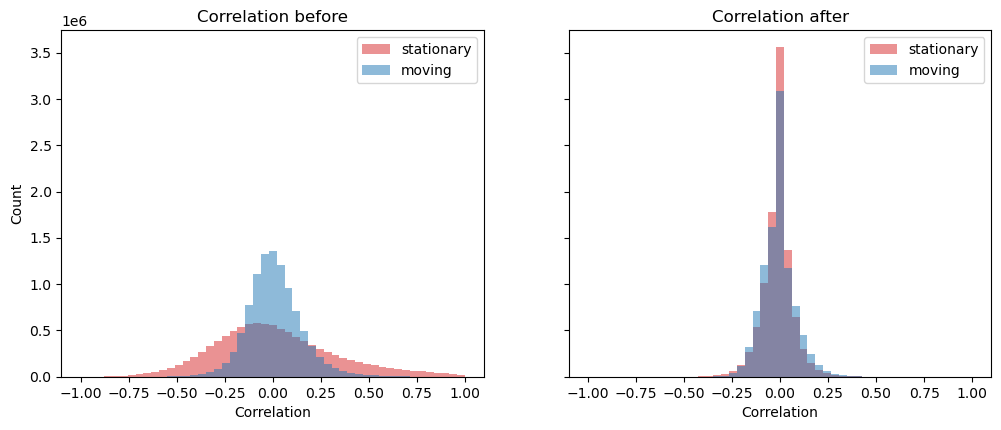

In [ ]:
# plot the correlation before and after
fig, ax = plt.subplots(1, 2, figsize=(8*1.5, 3*1.5), sharey=True)

bins = np.linspace(-1, 1, 50)

ax[0].hist(correlation_stationary.flatten(), bins=bins, color='tab:gray', label='stationary',alpha=0.5)
ax[0].hist(correlation_moving.flatten(), bins=bins, color='tab:orange', label='moving',alpha=0.5)
ax[1].hist(correlation_stationary_after.flatten(), bins=bins, color='tab:gray', label='stationary',alpha=0.5)
ax[1].hist(correlation_moving_after.flatten(), bins=bins, color='tab:orange', label='moving',alpha=0.5)
ax[0].set_title('Correlation before')
ax[1].set_title('Correlation after')
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel('Correlation')
ax[1].set_xlabel('Correlation')
ax[0].set_ylabel('Count')

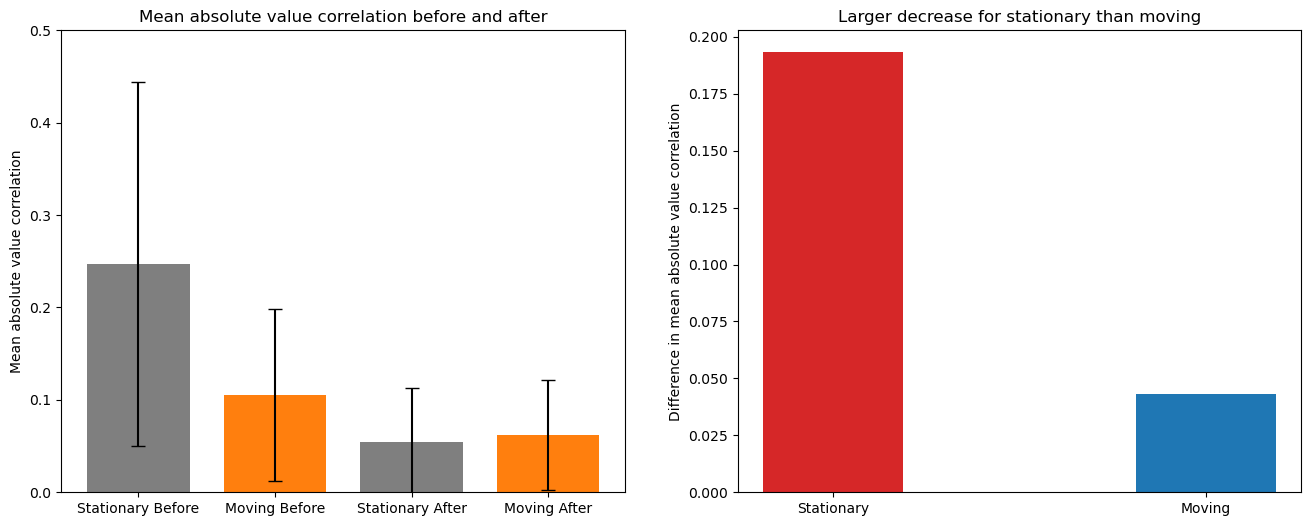

In [66]:
# bar plot of the average of absolute value of correlation before and after
abs_correlation_stationary = np.abs(correlation_stationary)
abs_correlation_moving = np.abs(correlation_moving)
abs_correlation_stationary_after = np.abs(correlation_stationary_after)
abs_correlation_moving_after = np.abs(correlation_moving_after)

# take the mean and std of the absolute values
mean_correlation_stationary = np.mean(abs_correlation_stationary)
mean_correlation_moving = np.mean(abs_correlation_moving)
mean_correlation_stationary_after = np.mean(abs_correlation_stationary_after)
mean_correlation_moving_after = np.mean(abs_correlation_moving_after)
std_correlation_stationary = np.std(abs_correlation_stationary)
std_correlation_moving = np.std(abs_correlation_moving)
std_correlation_stationary_after = np.std(abs_correlation_stationary_after)
std_correlation_moving_after = np.std(abs_correlation_moving_after)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# create a bar plot with the stationary and moving conditions together but before and after separately
barWidth = 0.75
difference = [mean_correlation_stationary - mean_correlation_stationary_after, mean_correlation_moving - mean_correlation_moving_after]
r1 = np.arange(4)
ax[0].bar([0, 2], [mean_correlation_stationary, mean_correlation_stationary_after], color='tab:gray', width=barWidth, yerr=[std_correlation_stationary, std_correlation_stationary_after], label='Stationary', capsize=5)
ax[0].bar([1, 3], [mean_correlation_moving, mean_correlation_moving_after], color='tab:orange', width=barWidth, yerr=[std_correlation_moving, std_correlation_moving_after], label='Moving', capsize=5)
ax[0].set_xticks([0, 1, 2, 3], labels=['Stationary Before', 'Moving Before', 'Stationary After', 'Moving After'])
ax[0].set_ylabel('Mean absolute value correlation')
ax[0].set_title('Mean absolute value correlation before and after')
ax[1].bar([1, 2], difference, color=['tab:red', 'tab:blue'], width=barWidth/2, label='Before - After')
ax[1].set_xticks([1, 2], labels=['Stationary', 'Moving'])
ax[1].set_ylabel('Difference in mean absolute value correlation')
ax[1].set_title('Larger decrease for stationary than moving')
ax[0].set_ylim(0, 0.5)
plt.savefig('../manuscript_figures/fig4_correlation_bar_plot.pdf', format='pdf', bbox_inches='tight')

Text(0, 0.5, 'Count')

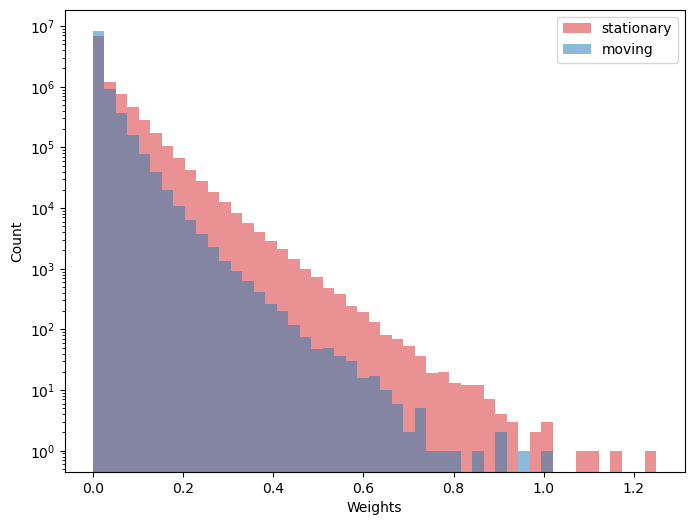

In [83]:
# plot the weights
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
bins = np.linspace(0, 1.25, 50)

ax.hist(weights_stationary_final.flatten(), bins=bins, color='tab:red', label='stationary',alpha=0.5)
ax.hist(weights_moving_final.flatten(), bins=bins, color='tab:blue', label='moving',alpha=0.5)
ax.legend()
ax.set_yscale('log')
ax.set_xlabel('Weights')
ax.set_ylabel('Count')

In [13]:
# check if the weights form a low-dimensional subspace by doing PCA on the weights for each reference filter
from sklearn.decomposition import PCA

# reshape the weights
weights_stationary_reshaped = weights_stationary_final[:, :, :, 0]
weights_moving_reshaped = weights_moving_final[:, :, :, 0]

In [14]:
num_components = 100
num_filters = 100

variance_explained_stationary = np.zeros((num_filters, num_components))
variance_explained_moving = np.zeros((num_filters, num_components))
components_stationary = np.zeros((num_filters, num_components, 100))
components_moving = np.zeros((num_filters, num_components, 100))

for i in range(num_filters):
    pca_stationary = PCA(n_components=num_components)
    pca_moving = PCA(n_components=num_components)
    pca_stationary.fit(weights_stationary_reshaped[i, :, :])
    pca_moving.fit(weights_moving_reshaped[i, :, :])
    variance_explained_stationary[i, :] = pca_stationary.explained_variance_ratio_
    variance_explained_moving[i, :] = pca_moving.explained_variance_ratio_
    components_stationary[i, :, :] = pca_stationary.components_
    components_moving[i, :, :] = pca_moving.components_

In [ ]:
# also do NMF

from sklearn.metrics import explained_variance_score
from sklearn.decomposition import NMF
from joblib import Parallel, delayed

num_components = 100
num_filters = 100

def compute_nmf_variance(i, j):
    nmf_stationary = NMF(n_components=j+1, max_iter=1000)
    nmf_moving = NMF(n_components=j+1, max_iter=1000)
    W_stationary = nmf_stationary.fit_transform(weights_stationary_reshaped[i, :, :])
    W_moving = nmf_moving.fit_transform(weights_moving_reshaped[i, :, :])
    nmf_components_stationary = nmf_stationary.components_
    nmf_components_moving = nmf_moving.components_
    variance_explained_stationary = explained_variance_score(weights_stationary_reshaped[i, :, :], nmf_stationary.inverse_transform(W_stationary), multioutput='variance_weighted')
    variance_explained_moving = explained_variance_score(weights_moving_reshaped[i, :, :], nmf_moving.inverse_transform(W_moving), multioutput='variance_weighted')
    return nmf_components_stationary, nmf_components_moving, variance_explained_stationary, variance_explained_moving

results = Parallel(n_jobs=-1)(delayed(compute_nmf_variance)(i, j) for i in range(num_filters) for j in range(num_components))

In [35]:
nmf_components_stationary = np.zeros((num_filters, num_components, num_components, 100))
nmf_components_moving = np.zeros((num_filters, num_components, num_components, 100))
nmf_variance_explained_stationary = np.zeros((num_filters, num_components))
nmf_variance_explained_moving = np.zeros((num_filters, num_components))

for i in range(num_filters):
    for j in range(num_components):
        nmf_components_stationary[i, j, :j+1, :] = results[num_components*i + j][0]
        nmf_components_moving[i, j, :j+1, :] = results[num_components*i + j][1]
        nmf_variance_explained_stationary[i, j] = results[num_components*i + j][2]
        nmf_variance_explained_moving[i, j] = results[num_components*i + j][3]

In [39]:
# save the nmf results
np.save(data_dir + '/nmf_components_stationary.npy', nmf_components_stationary)
np.save(data_dir + '/nmf_components_moving.npy', nmf_components_moving)
np.save(data_dir + '/nmf_variance_explained_stationary.npy', nmf_variance_explained_stationary)
np.save(data_dir + '/nmf_variance_explained_moving.npy', nmf_variance_explained_moving)

In [12]:
# load the nmf results
nmf_components_stationary = np.load(data_dir + '/nmf_components_stationary.npy')
nmf_components_moving = np.load(data_dir + '/nmf_components_moving.npy')
nmf_variance_explained_stationary = np.load(data_dir + '/nmf_variance_explained_stationary.npy')
nmf_variance_explained_moving = np.load(data_dir + '/nmf_variance_explained_moving.npy')

Text(0.5, 1.0, 'Explained variance by NMF components')

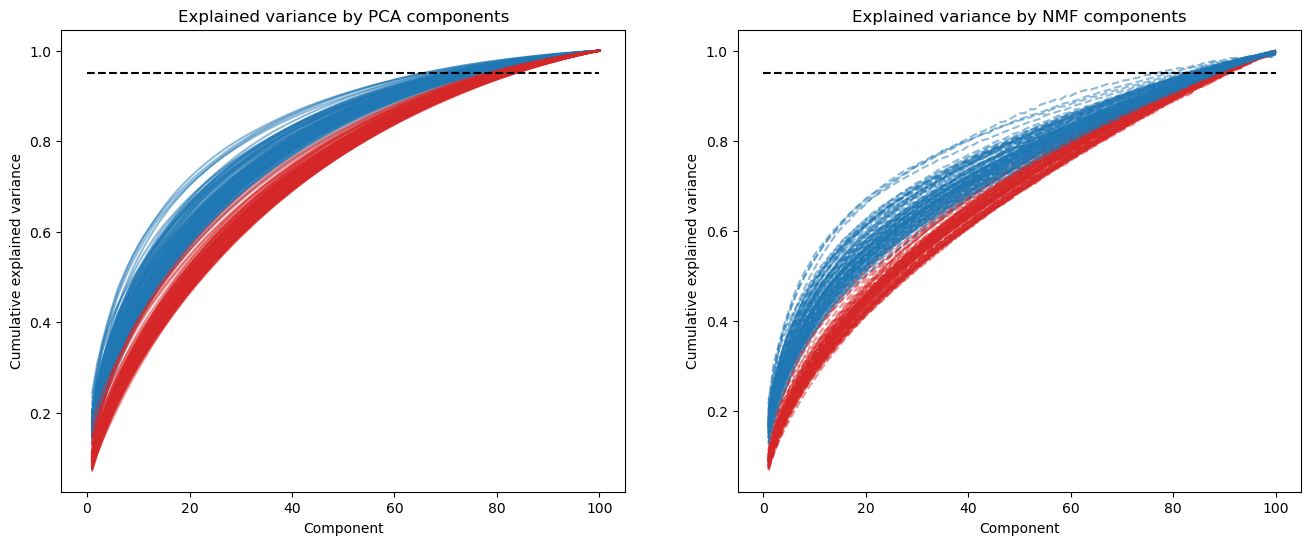

In [15]:
# plot the variance explained
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
list_of_components = np.arange(1, num_components+1)

ax[0].plot(list_of_components, np.cumsum(variance_explained_moving, axis=1).T, color='tab:blue', alpha=0.5)
ax[0].plot(list_of_components, np.cumsum(variance_explained_stationary, axis=1).T, color='tab:red', alpha=0.5)
ax[1].plot(list_of_components, nmf_variance_explained_stationary.T, color='tab:red', alpha=0.5, linestyle='--')
ax[1].plot(list_of_components, nmf_variance_explained_moving.T, color='tab:blue', alpha=0.5, linestyle='--')
ax[0].hlines(0.95, 0, num_components, color='black', linestyle='--')
ax[0].set_xlabel('Component')
ax[0].set_ylabel('Cumulative explained variance')
ax[0].set_title('Explained variance by PCA components')
ax[1].hlines(0.95, 0, num_components, color='black', linestyle='--')
ax[1].set_xlabel('Component')
ax[1].set_ylabel('Cumulative explained variance')
ax[1].set_title('Explained variance by NMF components')

Text(0.5, 1.0, 'variance explained by first NMF component')

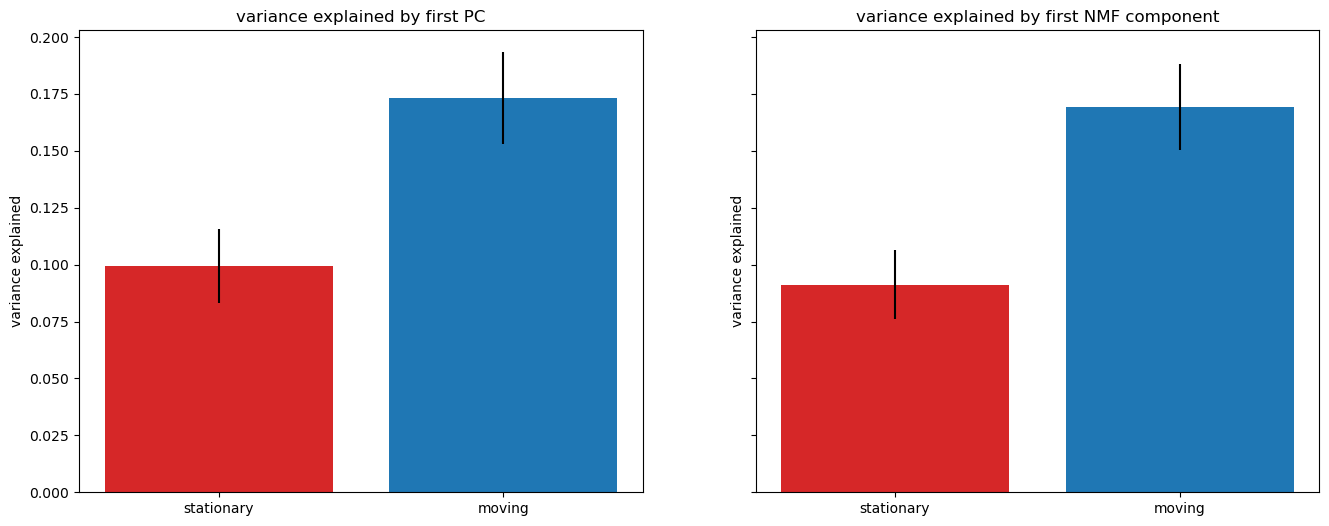

In [16]:
# For both conditions (stationary and moving) make a bar plot of the explained variance from the first PC averaged over each filter with error bars
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

mean_explained_variance_stationary = np.mean(variance_explained_stationary[:, 0])
std_explained_variance_stationary = np.std(variance_explained_stationary[:, 0])
mean_explained_variance_moving = np.mean(variance_explained_moving[:, 0])
std_explained_variance_moving = np.std(variance_explained_moving[:, 0])

mean_explained_variance_staitonary_nmf = np.mean(nmf_variance_explained_stationary[:, 0])
std_explained_variance_stationary_nmf = np.std(nmf_variance_explained_stationary[:, 0])
mean_explained_variance_moving_nmf = np.mean(nmf_variance_explained_moving[:, 0])
std_explained_variance_moving_nmf = np.std(nmf_variance_explained_moving[:, 0])

ax[0].bar(['stationary', 'moving'], [mean_explained_variance_stationary, mean_explained_variance_moving], yerr=[std_explained_variance_stationary, std_explained_variance_moving], color=['tab:red', 'tab:blue'])
ax[0].set_ylabel('variance explained')
ax[0].set_title('variance explained by first PC')
ax[1].bar(['stationary', 'moving'], [mean_explained_variance_staitonary_nmf, mean_explained_variance_moving_nmf], yerr=[std_explained_variance_stationary_nmf, std_explained_variance_moving_nmf], color=['tab:red', 'tab:blue'])
ax[1].set_ylabel('variance explained')
ax[1].set_title('variance explained by first NMF component')


In [ ]:
# take the mean of the weights over the windows and compute the correlation for this
mean_weights_stationary = torch.tensor(np.mean(weights_stationary[:, :, -1, :, :], axis=1), dtype=torch.float32)
mean_weights_moving = torch.tensor(np.mean(weights_moving[:, :, -1, :, :], axis=1), dtype=torch.float32)

# compute the correlation between the reference filter and the neighbors for the mean weights
import torch
from tqdm import tqdm
import numpy as np
from joblib import Parallel, delayed
from torch.optim import Adam

# now let's do this for a number of filters for a certain number of randomly drawn windows
num_windows = 100
num_filters = 100
window_size = 300  # Assuming window_size is defined somewhere

def process_filter_window(filt_idx, j):
    start_idx = int(start_indices[filt_idx, j])
    end_idx = start_idx + window_size

    neighbors_moving = np.delete(moving_responses_nonrandom[:101, 0, start_idx:end_idx], filt_idx, axis=0)
    neighbors_stationary = np.delete(stationary_responses_nonrandom[:101, 0, start_idx:end_idx], filt_idx, axis=0)
    ref_moving = moving_responses_nonrandom[filt_idx, 0, start_idx:end_idx]
    ref_stationary = stationary_responses_nonrandom[filt_idx, 0, start_idx:end_idx]

    # take absolute value of everything
    neighbors_moving = np.abs(neighbors_moving)
    neighbors_stationary = np.abs(neighbors_stationary)
    ref_moving = np.abs(ref_moving)
    ref_stationary = np.abs(ref_stationary)

    # optimize weights using PyTorch and gradient based methods
    # convert the data to torch tensors
    neighbors_moving = torch.tensor(neighbors_moving, dtype=torch.float32).T
    neighbors_stationary = torch.tensor(neighbors_stationary, dtype=torch.float32).T
    ref_moving = torch.tensor(ref_moving, dtype=torch.float32).view(-1, 1)
    ref_stationary = torch.tensor(ref_stationary, dtype=torch.float32).view(-1, 1)

    # Compute the residuals
    residuals_moving = ref_moving - torch.matmul(neighbors_moving, mean_weights_moving[filt_idx, :])
    residuals_stationary = ref_stationary - torch.matmul(neighbors_stationary, mean_weights_stationary[filt_idx, :])

    # Convert residuals to numpy arrays
    residuals_moving = residuals_moving.detach().cpu().numpy()
    residuals_stationary = residuals_stationary.detach().cpu().numpy()

    # Compute the correlation between the residuals and the neighbors
    correlation_moving_after = np.array([np.corrcoef(neighbors_moving[:, k].detach().cpu().numpy(), residuals_moving[:, 0])[0, 1] for k in range(100)])
    correlation_stationary_after = np.array([np.corrcoef(neighbors_stationary[:, k].detach().cpu().numpy(), residuals_stationary[:, 0])[0, 1] for k in range(100)])

    return (correlation_moving_after, correlation_stationary_after, residuals_moving, residuals_stationary)

results = Parallel(n_jobs=-1)(delayed(process_filter_window)(i, j) for i in tqdm(range(num_filters)) for j in range(num_windows))

In [ ]:
# make the arrays and unpack the results
correlation_moving_after_mean_weights = np.zeros((num_filters, num_windows, 100))
correlation_stationary_after_mean_weights = np.zeros((num_filters, num_windows, 100))
residuals_moving_arr_mean_weights = np.zeros((num_filters, num_windows, window_size, 1))
residuals_stationary_arr_mean_weights = np.zeros((num_filters, num_windows, window_size, 1))

for i in range(num_filters):
    for j in range(num_windows):
        (correlation_moving_after_mean_weights[i, j, :], correlation_stationary_after_mean_weights[i, j, :], residuals_moving_arr_mean_weights[i, j, :, :], residuals_stationary_arr_mean_weights[i, j, :, :]) = results[i * num_windows + j]

In [ ]:
# plot the correlation before and after
fig, ax = plt.subplots(1, 3, figsize=(12*1.5, 3*1.5), sharey=True)

bins = np.linspace(-1, 1, 50)

ax[0].hist(correlation_stationary.flatten(), bins=bins, color='tab:red', label='stationary',alpha=0.5)
ax[0].hist(correlation_moving.flatten(), bins=bins, color='tab:blue', label='moving',alpha=0.52)
ax[1].hist(correlation_stationary_after.flatten(), bins=bins, color='tab:red', label='stationary',alpha=0.5)
ax[1].hist(correlation_moving_after.flatten(), bins=bins, color='tab:blue', label='moving',alpha=0.5)
ax[2].hist(correlation_stationary_after_mean_weights.flatten(), bins=bins, color='tab:red', label='stationary',alpha=0.5)
ax[2].hist(correlation_moving_after_mean_weights.flatten(), bins=bins, color='tab:blue', label='moving',alpha=0.5)

## Test of splitting pos and neg

In [ ]:
import torch
from tqdm import tqdm
import numpy as np
from joblib import Parallel, delayed
from torch.optim import Adam

# now let's do this for a number of filters for a certain number of randomly drawn windows
num_windows = 10
num_filters = 100
num_neighbors = 100
window_size = 300  # Assuming window_size is defined somewhere
num_epochs = 500  # Reduced the number of epochs for faster optimization
learning_rate = 0.005
reg_lmbd = 0.1

# define the loss function as the mean pearson correlation (use torch.corrcoef) between the residuals and the neighbors
def loss_fn(neighbors, ref, weights, reg_lmbd=0.01):
    residuals = ref - torch.matmul(neighbors, weights)
    
    # Stack the residuals and neighbors
    stacked = torch.cat([residuals, neighbors], dim=1).T

    # compute the correlation
    correlation_matrix = torch.corrcoef(stacked)
    
    # Extract the correlations with the new reference response
    correlations = torch.abs(correlation_matrix[0, 1:])
    
    # Compute the mean correlation
    mean_correlation = correlations.mean()

    # compute the L1 norm of the weights
    # weight_norm = torch.norm(weights, p=1)
    # compute the L2 norm of the weights
    weight_norm = torch.norm(weights, p=2)

    return mean_correlation + reg_lmbd*weight_norm

def process_filter_window(filt_idx, j):
    start_idx = np.random.randint(0, stationary_responses_nonrandom.shape[2] - window_size)
    end_idx = start_idx + window_size

    neighbors_moving = np.delete(moving_responses_nonrandom[:num_neighbors+1, 0, start_idx:end_idx], filt_idx, axis=0)
    neighbors_stationary = np.delete(stationary_responses_nonrandom[:num_neighbors+1, 0, start_idx:end_idx], filt_idx, axis=0)
    ref_moving = moving_responses_nonrandom[filt_idx, 0, start_idx:end_idx]
    ref_stationary = stationary_responses_nonrandom[filt_idx, 0, start_idx:end_idx]

    # apply ReLU to the data and the negative of the data
    neighbors_moving_pos = np.maximum(neighbors_moving, 0)
    neighbors_stationary_pos = np.maximum(neighbors_stationary, 0)
    ref_moving_pos = np.maximum(ref_moving, 0)
    ref_stationary_pos = np.maximum(ref_stationary, 0)
    neighbors_moving_neg = np.maximum(-neighbors_moving, 0)
    neighbors_stationary_neg = np.maximum(-neighbors_stationary, 0)
    ref_moving_neg = np.maximum(-ref_moving, 0)
    ref_stationary_neg = np.maximum(-ref_stationary, 0)

    # concatenate these together treating them as different features
    neighbors_moving = np.concatenate([neighbors_moving_pos, neighbors_moving_neg], axis=0)
    neighbors_stationary = np.concatenate([neighbors_stationary_pos, neighbors_stationary_neg], axis=0)

    # Compute the correlation between the ref and neighbors
    correlation_moving_pos = np.array([np.corrcoef(neighbors_moving[k, :], ref_moving_pos)[0, 1] for k in range(2*num_neighbors)])
    correlation_stationary_pos = np.array([np.corrcoef(neighbors_stationary[k, :], ref_stationary_pos)[0, 1] for k in range(2*num_neighbors)])
    correlation_moving_neg = np.array([np.corrcoef(neighbors_moving[k, :], ref_moving_neg)[0, 1] for k in range(2*num_neighbors)])
    correlation_stationary_neg = np.array([np.corrcoef(neighbors_stationary[k, :], ref_stationary_neg)[0, 1] for k in range(2*num_neighbors)])

    # optimize weights using PyTorch and gradient based methods
    # convert the data to torch tensors
    neighbors_moving = torch.tensor(neighbors_moving, dtype=torch.float32).T
    neighbors_stationary = torch.tensor(neighbors_stationary, dtype=torch.float32).T
    ref_moving_pos = torch.tensor(ref_moving_pos, dtype=torch.float32).view(-1, 1)
    ref_stationary_pos = torch.tensor(ref_stationary_pos, dtype=torch.float32).view(-1, 1)
    ref_moving_neg = torch.tensor(ref_moving_neg, dtype=torch.float32).view(-1, 1)
    ref_stationary_neg = torch.tensor(ref_stationary_neg, dtype=torch.float32).view(-1, 1)

    # guess randomly the weights for the moving and stationary case between 0 and 1
    moving_weights_pos = torch.rand(neighbors_moving.shape[1], 1, dtype=torch.float32, requires_grad=True)
    stationary_weights_pos = torch.rand(neighbors_stationary.shape[1], 1, dtype=torch.float32, requires_grad=True)
    moving_weights_neg = torch.rand(neighbors_moving.shape[1], 1, dtype=torch.float32, requires_grad=True)
    stationary_weights_neg = torch.rand(neighbors_stationary.shape[1], 1, dtype=torch.float32, requires_grad=True)

    # define the optimizer
    optimizer_moving_pos = Adam([moving_weights_pos], lr=learning_rate)
    optimizer_stationary_pos = Adam([stationary_weights_pos], lr=learning_rate)
    optimizer_moving_neg = Adam([moving_weights_neg], lr=learning_rate)
    optimizer_stationary_neg = Adam([stationary_weights_neg], lr=learning_rate)

    loss_history_moving_pos = []
    weight_history_moving_pos = []
    loss_history_stationary_pos = []
    weight_history_stationary_pos = []
    loss_history_moving_neg = []
    weight_history_moving_neg = []
    loss_history_stationary_neg = []
    weight_history_stationary_neg = []

    # run the optimization
    for i in range(num_epochs):
        # zero grad from previous iteration
        optimizer_moving_pos.zero_grad()
        optimizer_moving_neg.zero_grad()
        optimizer_stationary_pos.zero_grad()
        optimizer_stationary_neg.zero_grad()
        # store the weights
        weight_history_moving_pos.append(moving_weights_pos.clone().detach().cpu().numpy())
        weight_history_moving_neg.append(moving_weights_neg.clone().detach().cpu().numpy())
        weight_history_stationary_pos.append(stationary_weights_pos.clone().detach().cpu().numpy())
        weight_history_stationary_neg.append(stationary_weights_neg.clone().detach().cpu().numpy())
        # compute and store the loss
        loss_moving_pos = loss_fn(neighbors_moving, ref_moving_pos, moving_weights_pos, reg_lmbd=reg_lmbd)
        loss_history_moving_pos.append(loss_moving_pos.item())
        loss_stationary_pos = loss_fn(neighbors_stationary, ref_stationary_pos, stationary_weights_pos, reg_lmbd=reg_lmbd)
        loss_history_stationary_pos.append(loss_stationary_pos.item())
        loss_moving_neg = loss_fn(neighbors_moving, ref_moving_neg, moving_weights_neg, reg_lmbd=reg_lmbd)
        loss_history_moving_neg.append(loss_moving_neg.item())
        loss_stationary_neg = loss_fn(neighbors_stationary, ref_stationary_neg, stationary_weights_neg, reg_lmbd=reg_lmbd)
        loss_history_stationary_neg.append(loss_stationary_neg.item())
        if i < num_epochs - 1:
            # backpropagate
            loss_moving_pos.backward()
            loss_moving_neg.backward()
            loss_stationary_pos.backward()
            loss_stationary_neg.backward()
            # update weights
            optimizer_moving_pos.step()
            optimizer_moving_neg.step()
            optimizer_stationary_pos.step()
            optimizer_stationary_neg.step()
            # Enforce positive weights
            with torch.no_grad():
                moving_weights_pos.data = torch.relu(moving_weights_pos.data)
                moving_weights_neg.data = torch.relu(moving_weights_neg.data)
                stationary_weights_pos.data = torch.relu(stationary_weights_pos.data)
                stationary_weights_neg.data = torch.relu(stationary_weights_neg.data)

    # cast the history to numpy arrays
    weight_history_moving_pos = np.array(weight_history_moving_pos)
    weight_history_moving_neg = np.array(weight_history_moving_neg)
    weight_history_stationary_pos = np.array(weight_history_stationary_pos)
    weight_history_stationary_neg = np.array(weight_history_stationary_neg)
    loss_history_moving_pos = np.array(loss_history_moving_pos)
    loss_history_moving_neg = np.array(loss_history_moving_neg)
    loss_history_stationary_pos = np.array(loss_history_stationary_pos)
    loss_history_stationary_neg = np.array(loss_history_stationary_neg)

    # Compute the residuals
    residuals_moving_pos = ref_moving_pos - torch.matmul(neighbors_moving, moving_weights_pos)
    residuals_stationary_pos = ref_stationary_pos - torch.matmul(neighbors_stationary, stationary_weights_pos)
    residuals_moving_neg = ref_moving_neg - torch.matmul(neighbors_moving, moving_weights_neg)
    residuals_stationary_neg = ref_stationary_neg - torch.matmul(neighbors_stationary, stationary_weights_neg)

    # Convert residuals to numpy arrays
    residuals_moving_pos = residuals_moving_pos.detach().cpu().numpy()
    residuals_stationary_pos = residuals_stationary_pos.detach().cpu().numpy()
    residuals_moving_neg = residuals_moving_neg.detach().cpu().numpy()
    residuals_stationary_neg = residuals_stationary_neg.detach().cpu().numpy()

    # Compute the correlation between the residuals and the neighbors
    correlation_moving_after_pos = np.array([np.corrcoef(neighbors_moving[:, k].detach().cpu().numpy(), residuals_moving_pos[:, 0])[0, 1] for k in range(2*num_neighbors)])
    correlation_stationary_after_pos = np.array([np.corrcoef(neighbors_stationary[:, k].detach().cpu().numpy(), residuals_stationary_pos[:, 0])[0, 1] for k in range(2*num_neighbors)])
    correlation_moving_after_neg = np.array([np.corrcoef(neighbors_moving[:, k].detach().cpu().numpy(), residuals_moving_neg[:, 0])[0, 1] for k in range(2*num_neighbors)])
    correlation_stationary_after_neg = np.array([np.corrcoef(neighbors_stationary[:, k].detach().cpu().numpy(), residuals_stationary_neg[:, 0])[0, 1] for k in range(2*num_neighbors)])

    return (weight_history_moving_pos, weight_history_stationary_pos, loss_history_moving_pos, loss_history_stationary_pos, correlation_moving_pos, correlation_stationary_pos, correlation_moving_after_pos, correlation_stationary_after_pos, residuals_moving_pos, residuals_stationary_pos, weight_history_moving_neg, weight_history_stationary_neg, loss_history_moving_neg, loss_history_stationary_neg, correlation_moving_neg, correlation_stationary_neg, correlation_moving_after_neg, correlation_stationary_after_neg, residuals_moving_neg, residuals_stationary_neg, start_idx)

results = Parallel(n_jobs=-1)(delayed(process_filter_window)(i, j) for i in tqdm(range(num_filters)) for j in range(num_windows))

In [ ]:
# make the arrays and unpack the results
weights_moving_pos = np.zeros((num_filters, num_windows, num_epochs, 2*num_neighbors, 1))
weights_stationary_pos = np.zeros((num_filters, num_windows, num_epochs, 2*num_neighbors, 1))
losses_moving_pos = np.zeros((num_filters, num_windows, num_epochs))
losses_stationary_pos = np.zeros((num_filters, num_windows, num_epochs))
correlation_moving_pos = np.zeros((num_filters, num_windows, 2*num_neighbors))
correlation_stationary_pos = np.zeros((num_filters, num_windows, 2*num_neighbors))
correlation_moving_after_pos = np.zeros((num_filters, num_windows, 2*num_neighbors))
correlation_stationary_after_pos = np.zeros((num_filters, num_windows, 2*num_neighbors))
residuals_moving_arr_pos = np.zeros((num_filters, num_windows, window_size, 1))
residuals_stationary_arr_pos = np.zeros((num_filters, num_windows, window_size, 1))
weights_moving_neg = np.zeros((num_filters, num_windows, num_epochs, 2*num_neighbors, 1))
weights_stationary_neg = np.zeros((num_filters, num_windows, num_epochs, 2*num_neighbors, 1))
losses_moving_neg = np.zeros((num_filters, num_windows, num_epochs))
losses_stationary_neg = np.zeros((num_filters, num_windows, num_epochs))
correlation_moving_neg = np.zeros((num_filters, num_windows, 2*num_neighbors))
correlation_stationary_neg = np.zeros((num_filters, num_windows, 2*num_neighbors))
correlation_moving_after_neg = np.zeros((num_filters, num_windows, 2*num_neighbors))
correlation_stationary_after_neg = np.zeros((num_filters, num_windows, 2*num_neighbors))
residuals_moving_arr_neg = np.zeros((num_filters, num_windows, window_size, 1))
residuals_stationary_arr_neg = np.zeros((num_filters, num_windows, window_size, 1))
start_indices = np.zeros((num_filters, num_windows))

for i in range(num_filters):
    for j in range(num_windows):
        (weights_moving_pos[i, j, :, :, :], weights_stationary_pos[i, j, :, :, :], losses_moving_pos[i, j, :], losses_stationary_pos[i, j, :],
         correlation_moving_pos[i, j, :], correlation_stationary_pos[i, j, :], correlation_moving_after_pos[i, j, :], correlation_stationary_after_pos[i, j, :],
         residuals_moving_arr_pos[i, j, :, :], residuals_stationary_arr_pos[i, j, :, :], weights_moving_neg[i, j, :, :, :], weights_stationary_neg[i, j, :, :, :], losses_moving_neg[i, j, :], losses_stationary_neg[i, j, :],
         correlation_moving_neg[i, j, :], correlation_stationary_neg[i, j, :], correlation_moving_after_neg[i, j, :], correlation_stationary_after_neg[i, j, :],
         residuals_moving_arr_neg[i, j, :, :], residuals_stationary_arr_neg[i, j, :, :], start_indices[i, j]) = results[i * num_windows + j]

In [ ]:
# save these data
data_dir = f'decorrelation_neighbors_pos_neg_pytorch_relu_l2_learning_rate_{learning_rate}_reg_lmbd_{reg_lmbd}'
# make the directory if it does not exist
import os
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
np.save(data_dir + '/weights_moving_pos', weights_moving_pos)
np.save(data_dir + '/weights_stationary_pos', weights_stationary_pos)
np.save(data_dir + '/losses_moving_pos', losses_moving_pos)
np.save(data_dir + '/losses_stationary_pos', losses_stationary_pos)
np.save(data_dir + '/correlation_moving_pos', correlation_moving_pos)
np.save(data_dir + '/correlation_stationary_pos', correlation_stationary_pos)
np.save(data_dir + '/correlation_moving_after_pos', correlation_moving_after_pos)
np.save(data_dir + '/correlation_stationary_after_pos', correlation_stationary_after_pos)
np.save(data_dir + '/residuals_moving_pos', residuals_moving_arr_pos)
np.save(data_dir + '/residuals_stationary_pos', residuals_stationary_arr_pos)
np.save(data_dir + '/weights_moving_neg', weights_moving_neg)
np.save(data_dir + '/weights_stationary_neg', weights_stationary_neg)
np.save(data_dir + '/losses_moving_neg', losses_moving_neg)
np.save(data_dir + '/losses_stationary_neg', losses_stationary_neg)
np.save(data_dir + '/correlation_moving_neg', correlation_moving_neg)
np.save(data_dir + '/correlation_stationary_neg', correlation_stationary_neg)
np.save(data_dir + '/correlation_moving_after_neg', correlation_moving_after_neg)
np.save(data_dir + '/correlation_stationary_after_neg', correlation_stationary_after_neg)
np.save(data_dir + '/residuals_moving_neg', residuals_moving_arr_neg)
np.save(data_dir + '/residuals_stationary_neg', residuals_stationary_arr_neg)
np.save(data_dir + '/start_indices', start_indices)

In [ ]:
# plot the correlation before and after
fig, ax = plt.subplots(2, 2, figsize=(8*2, 6*2), sharey=True)

bins = np.linspace(-1, 1, 50)

ax[0, 0].hist(correlation_stationary_pos.flatten(), bins=bins, color='tab:red', label='stationary',alpha=0.5)
ax[0, 0].hist(correlation_moving_pos.flatten(), bins=bins, color='tab:blue', label='moving',alpha=0.5)
ax[0, 1].hist(correlation_stationary_after_pos.flatten(), bins=bins, color='tab:red', label='stationary',alpha=0.5)
ax[0, 1].hist(correlation_moving_after_pos.flatten(), bins=bins, color='tab:blue', label='moving',alpha=0.5)
ax[1, 0].hist(correlation_stationary_neg.flatten(), bins=bins, color='tab:red', label='stationary',alpha=0.5)
ax[1, 0].hist(correlation_moving_neg.flatten(), bins=bins, color='tab:blue', label='moving',alpha=0.5)
ax[1, 1].hist(correlation_stationary_after_neg.flatten(), bins=bins, color='tab:red', label='stationary',alpha=0.5)
ax[1, 1].hist(correlation_moving_after_neg.flatten(), bins=bins, color='tab:blue', label='moving',alpha=0.5)

## Test of fitting one set of weights to multiple windows

In [ ]:
import torch
from tqdm import tqdm
import numpy as np
from joblib import Parallel, delayed
from torch.optim import Adam

# now let's do this for a number of filters for a certain number of randomly drawn windows
num_windows = 50
num_filters = 28
window_size = 300  # Assuming window_size is defined somewhere
num_epochs = 500  # Reduced the number of epochs for faster optimization
learning_rate = 0.002
reg_lmbd = 0.05

# Precompute the start and end indices for the windows
def precompute_window_indices(num_windows, window_size, data_length):
    start_indices = np.random.randint(0, data_length - window_size, size=num_windows)
    end_indices = start_indices + window_size
    return start_indices, end_indices

# define the loss function as the mean pearson correlation (use torch.corrcoef) between the residuals and the neighbors
def loss_fn(neighbors, ref, weights, reg_lmbd=0.01):
    residuals = ref - torch.matmul(neighbors, weights)
    
    # Stack the residuals and neighbors
    stacked = torch.cat([residuals, neighbors], dim=1).T

    # compute the correlation
    correlation_matrix = torch.corrcoef(stacked)
    
    # Extract the correlations with the new reference response
    correlations = torch.abs(correlation_matrix[0, 1:])
    # correlations = correlation_matrix[0, 1:]
    
    # Compute the mean correlation
    mean_correlation = correlations.mean()

    return mean_correlation

def process_filter(filt_idx, start_indices, end_indices):
    # Initialize the weights for the moving and stationary cases
    moving_weights = torch.rand(100, 1, dtype=torch.float32, requires_grad=True)
    stationary_weights = torch.rand(100, 1, dtype=torch.float32, requires_grad=True)

    # Define the optimizer
    optimizer_moving = Adam([moving_weights], lr=learning_rate)
    optimizer_stationary = Adam([stationary_weights], lr=learning_rate)

    loss_history_moving = []
    loss_history_stationary = []

    # Run the optimization
    for epoch in range(num_epochs):
        total_loss_moving = 0
        total_loss_stationary = 0

        for j in range(num_windows):
            start_idx = start_indices[j]
            end_idx = end_indices[j]

            neighbors_moving = np.delete(moving_responses_nonrandom[:101, 0, start_idx:end_idx], filt_idx, axis=0)
            neighbors_stationary = np.delete(stationary_responses_nonrandom[:101, 0, start_idx:end_idx], filt_idx, axis=0)
            ref_moving = moving_responses_nonrandom[filt_idx, 0, start_idx:end_idx]
            ref_stationary = stationary_responses_nonrandom[filt_idx, 0, start_idx:end_idx]

            # Take absolute value of everything
            neighbors_moving = np.abs(neighbors_moving)
            neighbors_stationary = np.abs(neighbors_stationary)
            ref_moving = np.abs(ref_moving)
            ref_stationary = np.abs(ref_stationary)

            # Convert the data to torch tensors
            neighbors_moving = torch.tensor(neighbors_moving, dtype=torch.float32).T
            neighbors_stationary = torch.tensor(neighbors_stationary, dtype=torch.float32).T
            ref_moving = torch.tensor(ref_moving, dtype=torch.float32).view(-1, 1)
            ref_stationary = torch.tensor(ref_stationary, dtype=torch.float32).view(-1, 1)

            # Compute the loss for the current window
            loss_moving = loss_fn(neighbors_moving, ref_moving, moving_weights, reg_lmbd=reg_lmbd)
            loss_stationary = loss_fn(neighbors_stationary, ref_stationary, stationary_weights, reg_lmbd=reg_lmbd)

            total_loss_moving += loss_moving
            total_loss_stationary += loss_stationary

        # Average the loss over all windows
        avg_loss_moving = total_loss_moving / num_windows + reg_lmbd * torch.norm(moving_weights, p=2)
        avg_loss_stationary = total_loss_stationary / num_windows + reg_lmbd * torch.norm(stationary_weights, p=2)

        # Zero grad from previous iteration
        optimizer_moving.zero_grad()
        optimizer_stationary.zero_grad()

        # Backpropagate
        avg_loss_moving.backward()
        avg_loss_stationary.backward()

        # Update weights
        optimizer_moving.step()
        optimizer_stationary.step()

        # Enforce positive weights
        with torch.no_grad():
            moving_weights.data = torch.relu(moving_weights.data)
            stationary_weights.data = torch.relu(stationary_weights.data)

        # Store the loss history
        loss_history_moving.append(avg_loss_moving.item())
        loss_history_stationary.append(avg_loss_stationary.item())

    return moving_weights.detach().cpu().numpy(), stationary_weights.detach().cpu().numpy(), loss_history_moving, loss_history_stationary

# Precompute window indices
data_length = stationary_responses_nonrandom.shape[2]
start_indices, end_indices = precompute_window_indices(num_windows, window_size, data_length)

# Optimize for all filter indices
results = Parallel(n_jobs=-1)(delayed(process_filter)(filt_idx, start_indices, end_indices) for filt_idx in tqdm(range(num_filters)))

# Extract the results
weights_moving_all = np.array([result[0] for result in results])
weights_stationary_all = np.array([result[1] for result in results])
loss_history_moving_all = np.array([result[2] for result in results])
loss_history_stationary_all = np.array([result[3] for result in results])

In [ ]:
plt.plot(loss_history_moving_all[:, :].T)
plt.plot(loss_history_stationary_all[:, :].T)

In [ ]:
# compute the correlation before and after the decorrelation with linear weighting of neighbors
correlation_moving_all = np.zeros((num_filters, num_windows, 100))
correlation_stationary_all = np.zeros((num_filters, num_windows, 100))
correlation_moving_after_all = np.zeros((num_filters, num_windows, 100))
correlation_stationary_after_all = np.zeros((num_filters, num_windows, 100))

for i in range(num_filters):
    for j in range(len(start_indices)):
        start_idx = start_indices[j]
        end_idx = end_indices[j]

        neighbors_moving = np.delete(moving_responses_nonrandom[:101, 0, start_idx:end_idx], i, axis=0)
        neighbors_stationary = np.delete(stationary_responses_nonrandom[:101, 0, start_idx:end_idx], i, axis=0)
        ref_moving = moving_responses_nonrandom[i, 0, start_idx:end_idx]
        ref_stationary = stationary_responses_nonrandom[i, 0, start_idx:end_idx]

        # take absolute value of everything
        neighbors_moving = np.abs(neighbors_moving)
        neighbors_stationary = np.abs(neighbors_stationary)
        ref_moving = np.abs(ref_moving)
        ref_stationary = np.abs(ref_stationary)

        # compute the correlation
        correlation_moving_all[i, j] = np.array([np.corrcoef(neighbors_moving[k, :], ref_moving)[0, 1] for k in range(100)])
        correlation_stationary_all[i, j] = np.array([np.corrcoef(neighbors_stationary[k, :], ref_stationary)[0, 1] for k in range(100)])

        # convert the data to torch tensors
        neighbors_moving = torch.tensor(neighbors_moving, dtype=torch.float32).T
        neighbors_stationary = torch.tensor(neighbors_stationary, dtype=torch.float32).T
        ref_moving = torch.tensor(ref_moving, dtype=torch.float32).view(-1, 1)
        ref_stationary = torch.tensor(ref_stationary, dtype=torch.float32).view(-1, 1)

        # compute the residuals
        residuals_moving = ref_moving - torch.matmul(neighbors_moving, torch.tensor(weights_moving_all[i, :]))
        residuals_stationary = ref_stationary - torch.matmul(neighbors_stationary, torch.tensor(weights_stationary_all[i, :]))

        # convert residuals to numpy arrays
        residuals_moving = residuals_moving.detach().cpu().numpy()
        residuals_stationary = residuals_stationary.detach().cpu().numpy()

        # compute the correlation between the residuals and the neighbors
        correlation_moving_after_all[i, j] = np.array([np.corrcoef(neighbors_moving[:, k].detach().cpu().numpy(), residuals_moving[:, 0])[0, 1] for k in range(100)])
        correlation_stationary_after_all[i, j] = np.array([np.corrcoef(neighbors_stationary[:, k].detach().cpu().numpy(), residuals_stationary[:, 0])[0, 1] for k in range(100)])

In [ ]:
# plot the correlation before and after

fig, ax = plt.subplots(1, 2, figsize=(8*2, 6), sharey=True)

bins = np.linspace(-1, 1, 50)

ax[0].hist(correlation_stationary_all.flatten(), bins=bins, color='tab:red', label='stationary',alpha=0.5)
ax[0].hist(correlation_moving_all.flatten(), bins=bins, color='tab:blue', label='moving',alpha=0.5)

ax[1].hist(correlation_stationary_after_all.flatten(), bins=bins, color='tab:red', label='stationary',alpha=0.5)
ax[1].hist(correlation_moving_after_all.flatten(), bins=bins, color='tab:blue', label='moving',alpha=0.5)

## Plot before and after for single filter

In [ ]:
# select a filter and a window to compute the linear regression
filt_idx = 5
start_idx = 2000
window_size = 300
end_idx = start_idx + window_size

neighbors_moving = np.delete(moving_responses_nonrandom[:101, 0, start_idx:end_idx], filt_idx, axis=0)
neighbors_stationary = np.delete(stationary_responses_nonrandom[:101, 0, start_idx:end_idx], filt_idx, axis=0)
ref_moving = moving_responses_nonrandom[filt_idx, 0, start_idx:end_idx]
ref_stationary = stationary_responses_nonrandom[filt_idx, 0, start_idx:end_idx]

# take the absolute value of everything
neighbors_moving = np.abs(neighbors_moving)
neighbors_stationary = np.abs(neighbors_stationary)
ref_moving = np.abs(ref_moving)
ref_stationary = np.abs(ref_stationary)

In [ ]:
# plot the 2D trajectory of the reference filter vs. the neighbor filter for the first 16 neighbors in a square grid for the stationary case
# also compute the correlation and print it above in the title
# fig, ax = plt.subplots(10, 10, figsize=(10*4, 10*4))

correlations_stationary = np.zeros(100)

for i in range(100):
    # ax[i//10, i%10].plot(neighbors_stationary[i, :], ref_stationary, 'o-', markersize=2)
    corr = np.corrcoef(neighbors_stationary[i, :], ref_stationary)[0, 1]
    correlations_stationary[i] = corr
    # ax[i//10, i%10].set_title(f'Correlation: {corr:.2f}')
    # make each subplot square
    # ax[i//4, i%4].set_aspect('equal')
# fig.suptitle('Stationary, before decorrelation')

In [ ]:
# plot the 2D trajectory of the reference filter vs. the neighbor filter for the first 16 neighbors in a square grid for the moving case
# also compute the correlation and print it above in the title
# fig, ax = plt.subplots(10, 10, figsize=(10*4, 10*4))

correlations_moving = np.zeros(100)

for i in range(100):
    # ax[i//10, i%10].plot(neighbors_moving[i, :], ref_moving, 'o-', markersize=2)
    corr = np.corrcoef(neighbors_moving[i, :], ref_moving)[0, 1]
    correlations_moving[i] = corr
    # ax[i//10, i%10].set_title(f'Correlation: {corr:.2f}')
    # make each subplot square
    # ax[i//4, i%4].set_aspect('equal')
# fig.suptitle('Stationary, before decorrelation')

In [ ]:
import torch

# convert the data to torch tensors
neighbors_moving = torch.tensor(neighbors_moving, dtype=torch.float32).T
neighbors_stationary = torch.tensor(neighbors_stationary, dtype=torch.float32).T
ref_moving = torch.tensor(ref_moving, dtype=torch.float32).view(-1, 1)
ref_stationary = torch.tensor(ref_stationary, dtype=torch.float32).view(-1, 1)

In [ ]:
# using pytorch and stochastic gradient descent find a set of weights such that the reference - weights * neighbors is decorrelated from the neighbors
import torch
from torch.optim import Adam
from sklearn.linear_model import LinearRegression

# define the weights, use linear regression as initialization
# Perform multiple linear regression
# reg_moving = LinearRegression(positive=True, fit_intercept=False).fit(neighbors_moving.numpy(), ref_moving.numpy())
# reg_stationary = LinearRegression(positive=True, fit_intercept=False).fit(neighbors_stationary.numpy(), ref_stationary.numpy())

# moving_weights = torch.tensor(reg_moving.coef_, dtype=torch.float32).view(-1, 1).clone().detach().requires_grad_(True)
# stationary_weights = torch.tensor(reg_stationary.coef_, dtype=torch.float32).view(-1, 1).clone().detach().requires_grad_(True)

# guess randomly the weights for the moving and stationary case between 0 and 1
moving_weights = torch.rand(neighbors_moving.shape[1], 1, dtype=torch.float32, requires_grad=True)
stationary_weights = torch.rand(neighbors_stationary.shape[1], 1, dtype=torch.float32, requires_grad=True)

# define the loss function as the mean pearson correlation (use torch.corrcoef) between the residuals and the neighbors
def loss_fn(neighbors, ref, weights):
    residuals = ref - torch.matmul(neighbors, weights)
    
    # Stack the residuals and neighbors
    stacked = torch.cat([residuals, neighbors], dim=1).T

    # compute the correlation
    correlation_matrix = torch.corrcoef(stacked)
    
    # Extract the correlations with the new reference response
    correlations = torch.abs(correlation_matrix[0, 1:])
    
    # Compute the mean correlation
    mean_correlation = correlations.mean()

    return mean_correlation

num_epochs = 5000

# define the optimizer
optimizer = Adam([moving_weights], lr=0.001)

loss_history_moving = []
weight_history_moving = []

# run the optimization
for i in range(num_epochs):
    # zero grad from previous iteration
    optimizer.zero_grad()
    # store the weights
    weight_history_moving.append(moving_weights.clone().detach().numpy())
    # compute and store the loss
    loss = loss_fn(neighbors_moving, ref_moving, moving_weights)
    loss_history_moving.append(loss.item())
    if i < num_epochs - 1:
        # backpropagate
        loss.backward()
        # update weights
        optimizer.step()
        # Enforce positive weights
        with torch.no_grad():
            moving_weights.data = torch.relu(moving_weights.data)

# repeat for the stationary case
# define the optimizer
optimizer = Adam([stationary_weights], lr=0.001)

loss_history_stationary = []
weight_history_stationary = []

# run the optimization
for i in range(num_epochs):
    # zero grad from previous iteration
    optimizer.zero_grad()
    # store the weights
    weight_history_stationary.append(stationary_weights.clone().detach().numpy())
    # compute and store the loss
    loss = loss_fn(neighbors_stationary, ref_stationary, stationary_weights)
    loss_history_stationary.append(loss.item())
    if i < num_epochs - 1:
        # backpropagate
        loss.backward()
        # update weights
        optimizer.step()
        # Enforce positive weights
        with torch.no_grad():
            stationary_weights.data = torch.relu(stationary_weights.data)

In [ ]:
bins=np.linspace(0, 1, 20)

plt.hist(moving_weights.detach().numpy().flatten(), bins=bins, alpha=0.5, color='tab:blue', label='Moving')
plt.hist(stationary_weights.detach().numpy().flatten(), bins=bins, alpha=0.5, color='tab:red', label='Stationary')
plt.yscale('log')

In [ ]:
plt.plot(loss_history_moving, color='tab:blue', label='Moving')
plt.plot(loss_history_stationary, color='tab:red', label='Stationary')
plt.ylim(0, 0.05)
plt.legend()

In [ ]:
# compute the residuals
residuals_moving = ref_moving - torch.matmul(neighbors_moving, moving_weights)
residuals_stationary = ref_stationary - torch.matmul(neighbors_stationary, stationary_weights)

In [ ]:
# plot the 2D trajectory of the reference filter vs. the neighbor filter for the first 16 neighbors in a square grid for the stationary case
# also compute the correlation and print it above in the title
plot_on = False
if plot_on:
    fig, ax = plt.subplots(10, 10, figsize=(10*4, 10*4))

correlations_after_stationary = np.zeros(100)

for i in range(100):
    corr = np.corrcoef(neighbors_stationary[:, i].detach().numpy(), residuals_stationary.detach().numpy().squeeze())[0, 1]
    correlations_after_stationary[i] = corr
    if plot_on:
        ax[i//10, i%10].plot(neighbors_stationary[:, i].detach().numpy(), residuals_stationary.detach().numpy().squeeze(), 'o-', markersize=2)
        ax[i//10, i%10].set_title(f'Correlation: {corr:.2f}')
    # make each subplot square
    # ax[i//4, i%4].set_aspect('equal')
if plot_on:
    fig.suptitle('Stationary, after decorrelation')

In [ ]:
# plot the 2D trajectory of the reference filter vs. the neighbor filter for the first 16 neighbors in a square grid for the moving case
# also compute the correlation and print it above in the title
if plot_on:
    fig, ax = plt.subplots(10, 10, figsize=(10*3, 10*3))

correlations_after_moving = np.zeros(100)

for i in range(100):
    corr = np.corrcoef(neighbors_moving[:, i].detach().numpy(), residuals_moving.detach().numpy().squeeze())[0, 1]
    correlations_after_moving[i] = corr
    if plot_on:
        ax[i//10, i%10].plot(neighbors_moving[:, i].detach().numpy(), residuals_moving.detach().numpy().squeeze(), 'o-', markersize=2)
        ax[i//10, i%10].set_title(f'Correlation: {corr:.2f}')
    # make each subplot square
    # ax[i//4, i%4].set_aspect('equal')
if plot_on:
    fig.suptitle('Moving, after decorrelation')

In [ ]:
# plot histogram of correlation before and after
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

bins = np.linspace(-1, 1, 50)

ax[0].hist(correlations_stationary, bins=bins, alpha=0.5, color='tab:red', label='Stationary')
ax[0].hist(correlations_moving, bins=bins, alpha=0.5, color='tab:blue', label='Moving')
ax[0].legend()
ax[0].set_title('Correlation before decorrelation')
ax[1].hist(correlations_after_stationary, bins=bins, alpha=0.5, color='tab:red', label='Stationary')
ax[1].hist(correlations_after_moving, bins=bins, alpha=0.5, color='tab:blue', label='Moving')
ax[1].legend()
ax[1].set_title('Correlation after decorrelation')

# Test of experimental result (Saleem et al.)

## Fit Gabor filters

In [1]:
# Define the Gabor filter function
def gabor_filter_func(sigma, theta, gamma, wavelength, phase, x_offset, y_offset, filt_size):
    y, x = np.meshgrid(
        np.arange(filt_size[1]) - filt_size[1] // 2,
        np.arange(filt_size[0]) - filt_size[0] // 2,
    )
    x = x - x_offset
    y = y + y_offset
    x_prime = x * np.cos(np.pi * theta / 180) + y * np.sin(np.pi * theta / 180)
    y_prime = -x * np.sin(np.pi * theta / 180) + y * np.cos(np.pi * theta / 180)
    filter = np.exp(-0.5 * (x_prime**2 + (gamma * y_prime) ** 2) / sigma**2) * np.cos(
        2 * np.pi * x_prime / wavelength + np.pi * phase / 180)
    filter_norm = np.linalg.norm(filter)
    filter /= filter_norm
    return filter

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

# Define the loss function with regularization
def loss_func(params, filt_size, ic_filter):
    sigma, theta, gamma, wavelength, phase, x_offset, y_offset = params
    gabor_filter = gabor_filter_func(
        sigma, theta, gamma, wavelength, phase, x_offset, y_offset, filt_size
    )
    return np.linalg.norm(ic_filter - gabor_filter)

# Define the initial guesses
initial_guesses = [
    [1, 180, 1, 10, 180, 0, 0],
    [2, 90, 1, 15, 90, 0, 0],
    [3, 45, 1, 20, 45, 0, 0],
    [4, 270, 1, 25, 270, 0, 0],
    [5, 135, 1, 30, 135, 0, 0],
    [6, 315, 1, 10, 315, 0, 0],
    [7, 0, 1, 15, 0, 0, 0],
    [8, 180, 1, 20, 180, 0, 0],
    [9, 90, 1, 25, 90, 0, 0],
    [10, 270, 1, 30, 270, 0, 0]
]

# Add variations in x_offset and y_offset
offsets = [-8, 0, 8]
filt_size = (32, 32)

# Introduce bounds
bounds = [(1, 10), (0, 360), (1, 10), (1, 30), (0, 360), (-16, 16), (-16, 16)]

# Function to run the optimization for a given initial guess and offsets
def optimize_gabor(initial_guess, x_offset, y_offset, filt_idx, ic_filter):
    initial_guess_with_offset = initial_guess.copy()
    initial_guess_with_offset[5] = x_offset
    initial_guess_with_offset[6] = y_offset
    res = minimize(loss_func, initial_guess_with_offset, args=(filt_size, ic_filter), bounds=bounds, method='L-BFGS-B')
    return res.fun, res.x

# Function to optimize for a single filter index
def optimize_for_filter(filt_idx):
    ic_filter = ic_components_high_tol[filt_idx, :].reshape(32, 32)
    results = Parallel(n_jobs=-1)(delayed(optimize_gabor)(initial_guess, x_offset, y_offset, filt_idx, ic_filter)
                                  for initial_guess in initial_guesses
                                  for x_offset in offsets
                                  for y_offset in offsets)
    best_loss, best_params = min(results, key=lambda x: x[0])
    return best_loss, best_params

# Optimize for all filter indices
num_filters = ic_components_high_tol.shape[0]
optimal_params_list = Parallel(n_jobs=-1)(delayed(optimize_for_filter)(filt_idx) for filt_idx in range(num_filters))

In [ ]:
# save the optimal parameters as a numpy array
optimal_params = np.array([optimal_params[1] for optimal_params in optimal_params_list])
np.save(data_dir + '/optimal_params_gabor_FastICA.npy', optimal_params)

In [ ]:
# load optimal params
data_dir = 'PCA_then_ICA'

# optimal_params = np.load(data_dir + '/optimal_params_gabor.npy')
optimal_params = np.load(data_dir + '/optimal_params_gabor_FastICA.npy')

In [ ]:
# extract wavelengths from optimal_params
wavelengths = optimal_params[:, 3]
orientations = optimal_params[:, 1]

(0.0, 0.5)

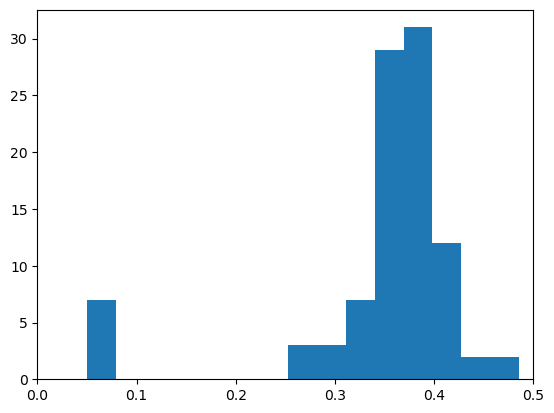

In [ ]:
plt.hist(wavelengths/20, bins=50)
plt.xlim(0, .5)

In [ ]:
freq_arr = 20/(8*np.array(wavelengths))

(array([ 0.,  0.,  0.,  4.,  3.,  0.,  1.,  0.,  0.,  2.,  2., 14., 38.,
        20.,  5.,  5.,  0.,  2.,  1.]),
 array([0.        , 0.02631579, 0.05263158, 0.07894737, 0.10526316,
        0.13157895, 0.15789474, 0.18421053, 0.21052632, 0.23684211,
        0.26315789, 0.28947368, 0.31578947, 0.34210526, 0.36842105,
        0.39473684, 0.42105263, 0.44736842, 0.47368421, 0.5       ]),
 <BarContainer object of 19 artists>)

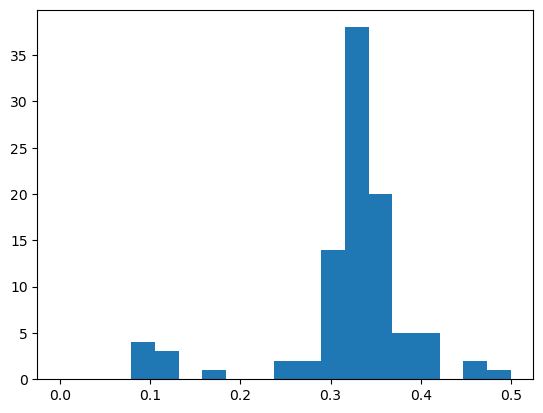

In [ ]:
plt.hist(freq_arr, bins=np.linspace(0, .5, 20))

In [ ]:
# sort by frequency
sort_idx_arr = np.argsort(orientations)

In [ ]:
# Assuming optimal_params_list and ic_components_high_tol are already defined

import matplotlib.colors as mcolors

norm = mcolors.TwoSlopeNorm(vmin=-0.05, vcenter=0, vmax=0.05)

filt_size = 32  # Assuming the filter size is 32x32
num_filters = 104

fig, axes = plt.subplots(21, 10, figsize=(10*2, 21*2))

gabor_filter_bank = np.zeros((num_filters, filt_size**2))

for filt_idx, sort_idx in enumerate(sort_idx_arr):
    ic_filter = ic_components_high_tol[sort_idx, :].reshape(filt_size, filt_size)
    gabor_filter = gabor_filter_func(*optimal_params[sort_idx, :], (filt_size, filt_size))
    gabor_filter_bank[sort_idx] = gabor_filter.flatten()

    row = filt_idx // 5
    col = (filt_idx % 5) * 2

    axes[row, col].imshow(ic_filter, cmap='gray', norm=norm)
    axes[row, col].set_title(f'IC Filter {sort_idx}')
    axes[row, col].axis('off')

    axes[row, col + 1].imshow(gabor_filter, cmap='gray', norm=norm)
    axes[row, col + 1].set_title(f'Gabor Filter {sort_idx}')
    axes[row, col + 1].axis('off')

plt.savefig(data_dir + '/gabor_filter_fits_FastICA.svg', format='svg')

plt.tight_layout()
plt.show()

# pick three filters
# 61, 22, 81

## Generate test stimuli

In [ ]:
# for each of the optimal fits produce the optimal grating masked with increasing radius
# create a set of stimuli by applying a circular mask to the optimal grating with different radii with a center point at x_offset and y_offset
num_stimuli = 40
filt_size = (32, 32)
num_filters = 104
contrast_values = [0.1, 0.5, 1]
test_stimuli_pos = np.zeros((num_filters, num_stimuli, len(contrast_values), filt_size[0]*filt_size[1]))
test_stimuli_neg = np.zeros((num_filters, num_stimuli, len(contrast_values), filt_size[0]*filt_size[1]))
x_offsets = np.zeros(num_filters)
y_offsets = np.zeros(num_filters)
theta_arr = np.zeros(num_filters)
radii = np.linspace(0, 40, num_stimuli)

for filt_idx in range(num_filters):
    _, theta, _, wavelength, phase, x_offset, y_offset = optimal_params[filt_idx, :]
    x_offsets[filt_idx] = x_offset
    y_offsets[filt_idx] = y_offset
    theta_arr[filt_idx] = theta
    optimal_grating_pos = gabor_filter_func(np.inf, theta, 1, wavelength, phase, x_offset, y_offset, filt_size)
    optimal_grating_neg = -optimal_grating_pos
    optimal_grating_pos = (optimal_grating_pos - optimal_grating_pos.mean())/optimal_grating_pos.std()
    optimal_grating_neg = (optimal_grating_neg - optimal_grating_neg.mean())/optimal_grating_neg.std()
    for j in range(len(contrast_values)):
        # zscore optimal grating
        optimal_grating_pos_contrast = contrast_values[j]* optimal_grating_pos
        optimal_grating_neg_contrast = contrast_values[j]* optimal_grating_neg
        for i, radius in enumerate(radii):
            mask = np.zeros(filt_size)
            y, x = np.meshgrid(
                np.arange(filt_size[1]) - filt_size[1] // 2,
                np.arange(filt_size[0]) - filt_size[0] // 2,
            )
            mask = np.sqrt((x - x_offset) ** 2 + (y + y_offset) ** 2) < radius
            stimulus = optimal_grating_pos_contrast * mask
            # stimulus = (stimulus - stimulus.mean())/stimulus.std()
            test_stimuli_pos[filt_idx, i, j, :] = stimulus.flatten()
            stimulis = optimal_grating_neg_contrast * mask
            # stimulus = (stimulus - stimulus.mean())/stimulus.std()
            test_stimuli_neg[filt_idx, i, j, :] = stimulus.flatten()

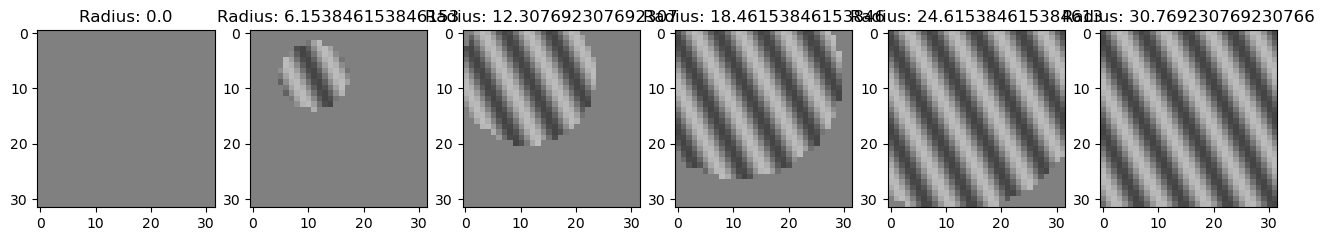

In [ ]:
# plot the test_stimuli
norm = mcolors.TwoSlopeNorm(vmin=-3, vcenter=0, vmax=3)
contrast_idx = 2

fig, ax = plt.subplots(1, 6, figsize=(16, 6))
for i in range(32):
    if i % 6 == 0:
        ax[i//6].imshow(test_stimuli_pos[5, i, contrast_idx, :].reshape(32, 32), cmap='gray', norm=norm)
        ax[i//6].set_title(f'Radius: {radii[i]}')

In [ ]:
# compute the response of the IC filters to the test stimuli
ic_filt_resp_pos = ic_components_high_tol @ test_stimuli_pos.T.reshape(filt_size[0]*filt_size[1], -1)
ic_filt_resp_pos = ic_filt_resp_pos.reshape(ic_filt_resp_pos.shape[0], len(contrast_values), num_stimuli, ic_filt_resp_pos.shape[0])
ic_filt_resp_neg = ic_components_high_tol @ test_stimuli_neg.T.reshape(filt_size[0]*filt_size[1], -1)
ic_filt_resp_neg = ic_filt_resp_neg.reshape(ic_filt_resp_neg.shape[0], len(contrast_values), num_stimuli, ic_filt_resp_neg.shape[0])

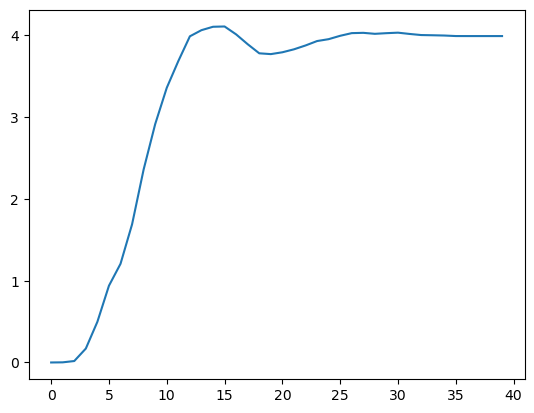

In [ ]:
filt_idx = 0

plt.plot(ic_filt_resp_pos[filt_idx, 2, :, filt_idx])

(array([6.000e+00, 4.000e+01, 4.500e+01, 2.400e+01, 3.200e+01, 2.800e+01,
        8.000e+00, 6.000e+00, 6.000e+00, 1.000e+01, 1.000e+01, 1.500e+01,
        1.600e+01, 6.000e+00, 1.400e+01, 1.300e+01, 2.000e+01, 2.400e+01,
        1.800e+01, 4.100e+01, 3.800e+01, 1.740e+02, 3.550e+02, 1.598e+03,
        7.620e+02, 3.700e+02, 1.710e+02, 3.900e+01, 4.800e+01, 2.100e+01,
        5.000e+01, 1.700e+01, 2.700e+01, 2.500e+01, 3.000e+00, 3.000e+00,
        1.000e+01, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 2.100e+01, 4.000e+00, 4.000e+00, 8.000e+00,
        4.000e+00, 2.100e+01]),
 array([-3.72512845, -3.56843345, -3.41173846, -3.25504347, -3.09834847,
        -2.94165348, -2.78495849, -2.62826349, -2.4715685 , -2.31487351,
        -2.15817851, -2.00148352, -1.84478853, -1.68809353, -1.53139854,
        -1.37470355, -1.21800855, -1.06131356, -0.90461857, -0.74792357,
        -0.59122858, -0.43453359, -0.27783859, -0.1211436 ,  0.03555139,
         0.

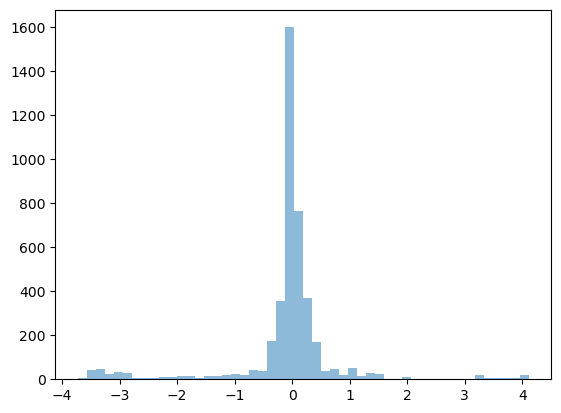

In [ ]:
plt.hist(ic_filt_resp_pos[filt_idx, 2, :, :].flatten(), bins=50, alpha=0.5, color='tab:blue', label='Positive')

### Weight visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming optimal_params_list, weights_moving, weights_stationary, x_offsets, y_offsets, and theta_arr are defined

weights_moving_avg = weights_moving.mean(axis=1)
weights_stationary_avg = weights_stationary.mean(axis=1)

length_scale = 10
width_scale = 10

for filt_idx in range(num_filters):

    # Normalize the weights to be between -1 and 1 with the same normalization scheme for the moving and stationary weights
    norm_factor = np.max([np.abs(weights_moving_avg[filt_idx, :]).max(), np.abs(weights_stationary_avg[filt_idx, :]).max()])
    weights_moving_normalized = weights_moving_avg[filt_idx, :] / norm_factor
    weights_stationary_normalized = weights_stationary_avg[filt_idx, :] / norm_factor

    # Define the same colormap for both the moving and stationary weights with scale from -1 to 1
    cmap = plt.cm.get_cmap('coolwarm')
    norm = mcolors.Normalize(vmin=-1, vmax=1)
    colors_moving = cmap(norm(weights_moving_normalized))
    colors_stationary = cmap(norm(weights_stationary_normalized))

    # Remove the reference filter from the offsets
    x_offsets_neighbors = np.delete(x_offsets[:101], filt_idx)
    y_offsets_neighbors = np.delete(y_offsets[:101], filt_idx)

    # Define sizes based on the absolute value of the weights
    sizes_moving = np.abs(weights_moving_normalized) * width_scale  # Scale factor for visibility
    sizes_stationary = np.abs(weights_stationary_normalized) * width_scale  # Scale factor for visibility

    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    # Convert theta from degrees to radians
    theta_radians = np.deg2rad(theta_arr)
    # remove the filt_idx to get the neighbors
    theta_radians_neighbors = np.delete(theta_radians, filt_idx)

    # Plot for moving weights
    dy = np.cos(theta_radians[filt_idx]) * length_scale
    dx = np.sin(theta_radians[filt_idx]) * length_scale
    axes[0].plot([-y_offsets[filt_idx] - dy/2, -y_offsets[filt_idx] + dy/2], [-x_offsets[filt_idx] - dx/2, -x_offsets[filt_idx] + dx/2], 'k', linewidth=width_scale, zorder=np.inf)
    for i in range(len(x_offsets_neighbors)):
        dy = np.cos(theta_radians_neighbors[i]) * length_scale
        dx = np.sin(theta_radians_neighbors[i]) * length_scale
        linewidth_scale = width_scale # sizes_moving[i]
        axes[0].plot([-y_offsets_neighbors[i] - dy/2, -y_offsets_neighbors[i] + dy/2], [-x_offsets_neighbors[i] - dx/2, -x_offsets_neighbors[i] + dx/2], color=colors_moving[i], linewidth=linewidth_scale, zorder=sizes_moving[i])
    axes[0].set_aspect('equal', adjustable='box')
    axes[0].set_title('Spatial Weighting of IC Neighbors (Moving)')
    # remove axes
    axes[0].axis('off')

    dy = np.cos(theta_radians[filt_idx]) * length_scale
    dx = np.sin(theta_radians[filt_idx]) * length_scale
    print(dy, dx)
    # Plot for stationary weights
    axes[1].plot([-y_offsets[filt_idx] - dy/2, -y_offsets[filt_idx] + dy/2], [-x_offsets[filt_idx] - dx/2, -x_offsets[filt_idx] + dx/2], 'k', linewidth=width_scale, zorder=np.inf)
    for i in range(len(x_offsets_neighbors)):
        dy = np.cos(theta_radians_neighbors[i]) * length_scale
        dx = np.sin(theta_radians_neighbors[i]) * length_scale
        linewidth_scale = width_scale # sizes_stationary[i]
        axes[1].plot([-y_offsets_neighbors[i] - dy/2, -y_offsets_neighbors[i] + dy/2], [-x_offsets_neighbors[i] - dx/2, -x_offsets_neighbors[i] + dx/2], color=colors_stationary[i], linewidth=linewidth_scale, zorder=sizes_stationary[i])
    axes[1].set_aspect('equal', adjustable='box')
    axes[1].set_title('Spatial Weighting of IC Neighbors (Stationary)')
    # remove axes
    axes[1].axis('off')

    # include the filter index in the title, as well as the top 3 neighbors indices
    top_5_neighbors = np.argsort(np.abs(weights_stationary_avg[filt_idx, :]))[-5:]
    # account for the fact the reference filter is removed from the neighbors so the indices need to be shifted
    top_5_neighbors = [x if x < filt_idx else x + 1 for x in top_5_neighbors]
    title = f'Filter Index: {filt_idx}\nTop 3 Neighbors: {top_5_neighbors}'
    fig.suptitle(title)

    plt.show()

## Regression on the absolute value of filter outputs

In [ ]:
import bottleneck as bn

fps = 30
window_length = 5 # seconds
window_size = int(window_length * fps)

stat_windowed_sd = bn.move_std(stationary_responses_nonrandom, window=window_size, min_count=window_size, axis=-1)
mov_windowed_sd = bn.move_std(moving_responses_nonrandom, window=window_size, min_count=window_size, axis=-1)
mean_stat_windowed_sd = np.nanmean(stat_windowed_sd, axis=-1)
mean_mov_windowed_sd = np.nanmean(mov_windowed_sd, axis=-1)

In [ ]:
ratio_avg_sd = mean_mov_windowed_sd[:, 0]/mean_stat_windowed_sd[:, 0]

In [ ]:
# optimal param code
'''
This script optimizes logistic nonlinearities for a variety of Gaussian distributions and plots the optimal parameters.
Author: Jonathan Gant
Date: 29.08.2024
Optimized for performance using Numba
'''

import numpy as np
import os
from numba import njit

# Define the logistic non-linearity
@njit
def logistic_func(s, s_0=0, k=1, L=1):
    return L / (1 + np.exp(-k * (s - s_0)))

# Directory for saving resultso
dir_name = 'gaussian_optimization_analytic_fast_for_ic_numba_more_sigma'
os.makedirs(dir_name, exist_ok=True)

MI_arr = np.load(os.path.join(dir_name, 'MI_arr.npy'))
average_response_arr = np.load(os.path.join(dir_name, 'average_response_arr.npy'))
stim_entropy_arr = np.load(os.path.join(dir_name, 'stim_entropy_arr.npy'))
sigma_arr = np.load(os.path.join(dir_name, 'sigma_arr.npy'))
k_arr = np.load(os.path.join(dir_name, 'k_arr.npy'))
L_arr = np.load(os.path.join(dir_name, 'L_arr.npy'))
response_bins = np.load(os.path.join(dir_name, 'response_bins.npy'))

# for each sigma compute the optimal parameters for a range of different lambdas
lambda_arr = np.arange(0, 2.25, .25)
optimal_k = np.zeros((len(sigma_arr), len(lambda_arr)))
optimal_L = np.zeros((len(sigma_arr), len(lambda_arr)))

# import gaussian filter to involve
from scipy.ndimage import gaussian_filter

for i, lambda_ in enumerate(lambda_arr):
    utility = MI_arr - lambda_ * average_response_arr # np.clip(MI_arr/stimulus_entropy[:, np.newaxis, np.newaxis], 0, 1) - lambda_ * average_response_arr
    print(utility.shape)
    # utility = gaussian_filter(utility, sigma=5, axes=(1, 2))
    for j, sigma in enumerate(sigma_arr):
        optimal_k[j, i] = k_arr[np.unravel_index(np.argmax(utility[j, :, :]), utility[j, :, :].shape)[0]]
        optimal_L[j, i] = L_arr[np.unravel_index(np.argmax(utility[j, :, :]), utility[j, :, :].shape)[1]]

# find the optimal L and k for each filter
num_filters = moving_responses_nonrandom.shape[0]
optimal_k_arr_moving = np.zeros((num_filters, len(lambda_arr)))
optimal_L_arr_moving = np.zeros((num_filters, len(lambda_arr)))
optimal_k_arr_stationary = np.zeros((num_filters, len(lambda_arr)))
optimal_L_arr_stationary = np.zeros((num_filters, len(lambda_arr)))

for i in range(num_filters):
    test_moving_std = mean_mov_windowed_sd[i, 0]
    test_stationary_std = mean_stat_windowed_sd[i, 0]
    for n, lambda_ in enumerate(lambda_arr):
        moving_idx = np.argmin(np.abs(sigma_arr - test_moving_std))
        optimal_k_arr_moving[i, n] = optimal_k[moving_idx, n]
        optimal_L_arr_moving[i, n] = optimal_L[moving_idx, n]
        stationary_idx = np.argmin(np.abs(sigma_arr - test_stationary_std))
        optimal_k_arr_stationary[i, n] = optimal_k[stationary_idx, n]
        optimal_L_arr_stationary[i, n] = optimal_L[stationary_idx, n]

(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)


In [ ]:
ic_filt_resp_pos.shape

(104, 3, 40, 104)

In [ ]:
num_windows = weights_moving_final.shape[1]

moving_outputs = np.zeros((100, len(contrast_values), num_windows, num_stimuli))
stationary_outputs = np.zeros((100, len(contrast_values), num_windows, num_stimuli))
lambda_idx = 1
for filt_idx in range(100):
    for i, contrast_val in enumerate(contrast_values):
        ref_filt_output = ic_filt_resp_pos[filt_idx, i, :, filt_idx]
        neighbors = np.delete(ic_filt_resp_pos[:101, i, :, filt_idx], filt_idx, axis=0)

        # std_output_stationary = np.std(ic_filt_resp_pos[filt_idx, i, :, :])
        # std_output_moving = ratio_avg_sd[filt_idx] * std_output_stationary
        # mean_output_moving = 0
        # mean_output_stationary = 0
        # moving_idx = np.argmin(np.abs(sigma_arr - std_output_moving))
        # optimal_k_arr_moving_val = optimal_k[moving_idx, lambda_idx]
        # optimal_L_arr_moving_val = optimal_L[moving_idx, lambda_idx]
        # stationary_idx = np.argmin(np.abs(sigma_arr - std_output_stationary))
        # optimal_k_arr_stationary_val = optimal_k[stationary_idx, lambda_idx]
        # optimal_L_arr_stationary_val = optimal_L[stationary_idx, lambda_idx]

        # # demean
        # ref_filt_output = ref_filt_output - ref_filt_output.mean()
        # neighbors = neighbors - neighbors.mean(axis=1)[:, np.newaxis]

        # apply relu
        ref_filt_output = np.maximum(ref_filt_output, 0)
        neighbors = np.maximum(neighbors, 0)

        # # take absolute value of the ref and neighbors
        # ref_filt_output = np.abs(ref_filt_output)
        # neighbors = np.abs(neighbors)

        for window_idx in range(num_windows):
            output_moving = ref_filt_output - weights_moving_final[filt_idx, window_idx, :, 0] @ neighbors
            output_stationary = ref_filt_output - weights_stationary_final[filt_idx, window_idx, :, 0] @ neighbors
            # find the optimal L and k

            # optimal_k_arr_moving_val = optimal_k_arr_moving[filt_idx, lambda_idx]
            # optimal_L_arr_moving_val = optimal_L_arr_moving[filt_idx, lambda_idx]
            # mean_output_moving = output_moving.mean()
            # optimal_k_arr_stationary_val = optimal_k_arr_stationary[filt_idx, lambda_idx]
            # optimal_L_arr_stationary_val = optimal_L_arr_stationary[filt_idx, lambda_idx]
            # mean_output_stationary = output_stationary.mean()

            # compute the nonlinearity output
            # output_moving = optimal_L_arr_moving_val / (1 + np.exp(-optimal_k_arr_moving_val * (output_moving-mean_output_moving)))
            # output_stationary = optimal_L_arr_stationary_val / (1 + np.exp(-optimal_k_arr_stationary_val * (output_stationary-mean_output_stationary)))

            moving_outputs[filt_idx, i, window_idx, :] = output_moving
            stationary_outputs[filt_idx, i, window_idx, :] = output_stationary

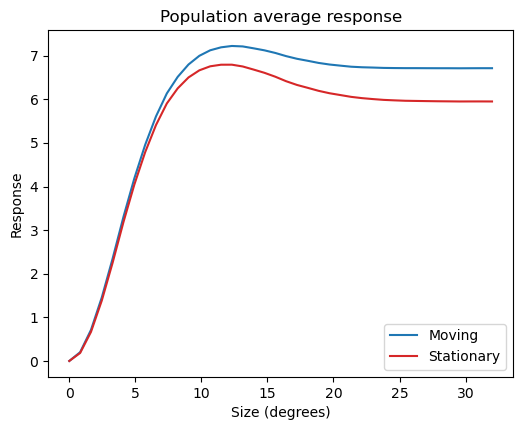

In [ ]:
contrast_idx = 2
start_idx = 0
end_idx = 40
# set the figsize to 4 by 3
plt.figure(figsize=(4*1.5, 3*1.5))
plt.plot(2*radii[start_idx:end_idx]/2.5, np.mean(moving_outputs, axis=(0, 2))[contrast_idx, start_idx:end_idx], color='tab:blue', label='Moving')
plt.plot(2*radii[start_idx:end_idx]/2.5, np.mean(stationary_outputs, axis=(0, 2))[contrast_idx, start_idx:end_idx], color='tab:red', label='Stationary')
plt.legend()
plt.xlabel('Size (degrees)')
plt.ylabel('Response')
plt.title('Population average response')
# compute the suppression index as the peak minus the last value divided by the last value
supp_idx_mov = (np.max(np.mean(moving_outputs, axis=(0, 2))[contrast_idx, :])-np.mean(moving_outputs, axis=(0, 2))[contrast_idx, -1])/(np.mean(moving_outputs, axis=(0, 2))[contrast_idx, -1])
supp_idx_stat = (np.max(np.mean(stationary_outputs, axis=(0, 2))[contrast_idx, :])-np.mean(stationary_outputs, axis=(0, 2))[contrast_idx, -1])/(np.mean(stationary_outputs, axis=(0, 2))[contrast_idx, -1])
# include the suppression index to 2 decimal places as text in the plot
# plt.text(18, 1, f'Suppression Index Moving: {supp_idx_mov:.2f}\nSuppression Index Stationary: {supp_idx_stat:.2f}')

In [ ]:
contrast_idx = 2
start_idx = 0
end_idx = 40

# compute the min over both conditions
moving_mins = moving_outputs.min(axis=(2,3))
stationary_mins = stationary_outputs.min(axis=(2,3))
# compute the max over both conditions
moving_maxs = moving_outputs.max(axis=(2,3))
stationary_maxs = stationary_outputs.max(axis=(2,3))

# min per individual window, max

# combine them
combined_mins = np.minimum(moving_mins, stationary_mins)


# normalize the response to be between 0 and 1 for each filter and window using both the stationary and moving conditions
# moving_outputs_norm = (moving_outputs - combined_mins[:, :, :, np.newaxis])/(combined_maxs - combined_mins)[:, :, :, np.newaxis]
# stationary_outputs_norm = (stationary_outputs - combined_mins[:, :, :, np.newaxis])/(combined_maxs - combined_mins)[:, :, :, np.newaxis]
# moving_outputs_norm = (moving_outputs - combined_mins[:, :, np.newaxis, np.newaxis])/(combined_maxs - combined_mins)[:, :, np.newaxis, np.newaxis]
# stationary_outputs_norm = (stationary_outputs - combined_mins[:, :, np.newaxis, np.newaxis])/(combined_maxs - combined_mins)[:, :, np.newaxis, np.newaxis]
# moving_outputs_norm = (moving_outputs - moving_outputs.min(axis=(2, 3))[:, :, np.newaxis, np.newaxis])/(moving_outputs.max(axis=(2, 3)) - moving_outputs.min(axis=(2, 3)))[:, :, np.newaxis, np.newaxis]
# stationary_outputs_norm = (stationary_outputs - stationary_outputs.min(axis=(2, 3))[:, :, np.newaxis, np.newaxis])/(stationary_outputs.max(axis=(2, 3)) - stationary_outputs.min(axis=(2, 3)))[:, :, np.newaxis, np.newaxis]
# normalize the response to be between 0 and 1 for each filter and window
# moving_outputs_norm = (moving_outputs - moving_outputs.min(axis=3)[:, :, :, np.newaxis])/(moving_outputs.max(axis=3) - moving_outputs.min(axis=3))[:, :, :, np.newaxis]
# stationary_outputs_norm = (stationary_outputs - stationary_outputs.min(axis=3)[:, :, :, np.newaxis])/(stationary_outputs.max(axis=3) - stationary_outputs.min(axis=3))[:, :, :, np.newaxis]
# moving_outputs_reduced = np.delete(moving_outputs, [58, 16, 80, 7], axis=0)
# stationary_outputs_reduced = np.delete(stationary_outputs, [58, 16, 80, 7], axis=0)
# moving_outputs_norm = (moving_outputs_reduced - moving_outputs_reduced.min(axis=3)[:, :, :, np.newaxis])
# stationary_outputs_norm = (stationary_outputs_reduced - stationary_outputs_reduced.min(axis=3)[:, :, :, np.newaxis])
moving_outputs_norm = (moving_outputs - moving_outputs.min(axis=3)[:, :, :, np.newaxis])
stationary_outputs_norm = (stationary_outputs - stationary_outputs.min(axis=3)[:, :, :, np.newaxis])
moving_maxs = moving_outputs_norm.max(axis=(2,3))
stationary_maxs = stationary_outputs_norm.max(axis=(2,3))
combined_maxs = np.maximum(moving_maxs, stationary_maxs)
moving_outputs_norm = moving_outputs_norm/combined_maxs[:, :, np.newaxis, np.newaxis]
stationary_outputs_norm = stationary_outputs_norm/combined_maxs[:, :, np.newaxis, np.newaxis]

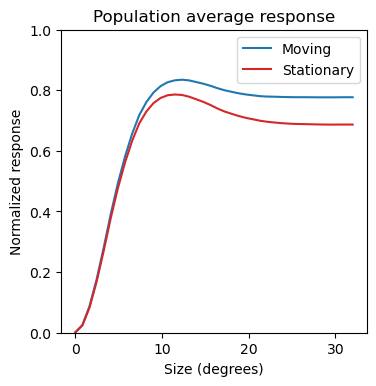

In [ ]:
contrast_idx = 2
start_idx = 0
end_idx = 40
cm = 1/2.54
# set the figsize to 4 by 3
plt.figure(figsize=(10*cm, 10*cm))
plt.plot(2*radii[start_idx:end_idx]/2.5, np.mean(moving_outputs_norm, axis=(0, 2))[contrast_idx, start_idx:end_idx], color='tab:blue', label='Moving')
plt.plot(2*radii[start_idx:end_idx]/2.5, np.mean(stationary_outputs_norm, axis=(0, 2))[contrast_idx, start_idx:end_idx], color='tab:red', label='Stationary')
plt.legend()
plt.xlabel('Size (degrees)')
plt.ylabel('Normalized response')
plt.title('Population average response')
plt.ylim(0, 1)
# compute the suppression index as the peak minus the last value divided by the last value
# save as svg
plt.savefig('../cosyne_2025_figures/network_interaction_population_response.svg', format='svg')

In [ ]:
moving_outputs_norm.shape

(100, 3, 1000, 40)

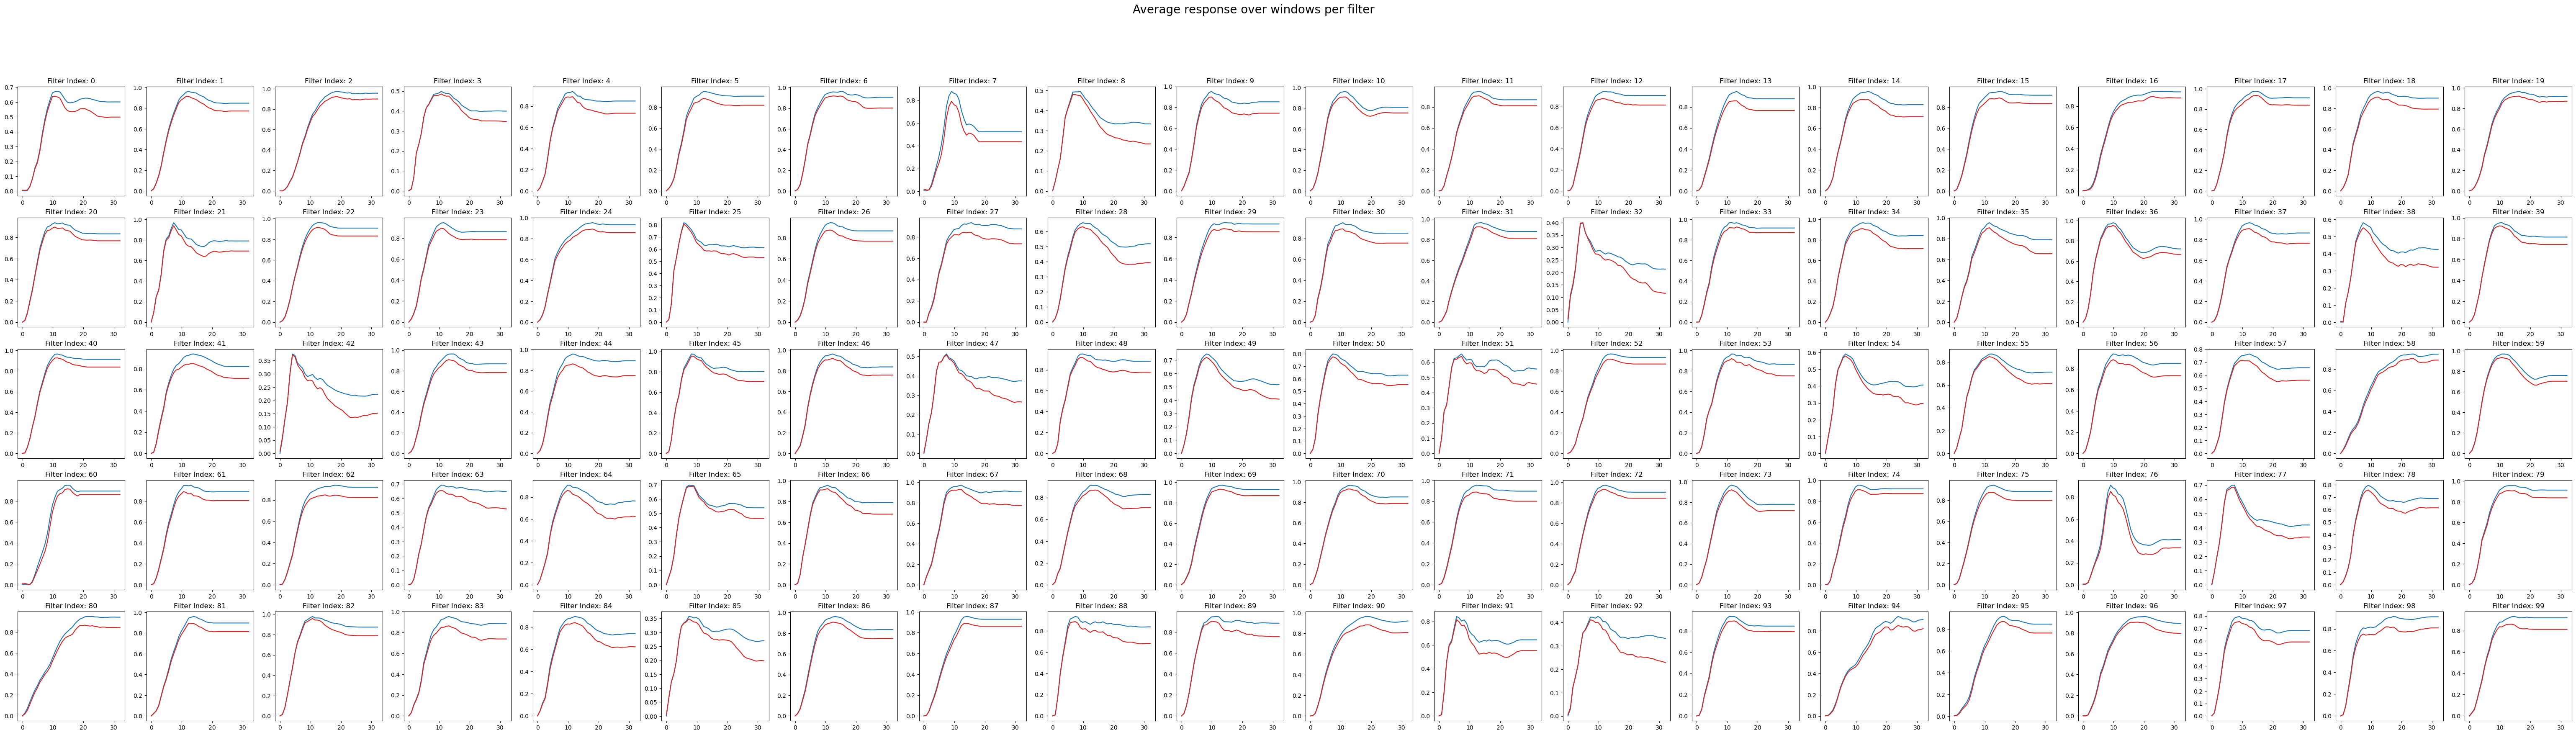

In [ ]:
# plot a 10 by 10 grid with the average over windows for each filter
fig, ax = plt.subplots(5, 20, figsize=(20*10*cm, 5*10*cm))

axes = ax.flatten()
contrast_idx = 2

supp_idx_moving_all = np.zeros(100)
supp_idx_stationary_all = np.zeros(100)

for filt_idx in range(100):
    axes[filt_idx].plot(2*radii/2.5, np.mean(moving_outputs_norm[filt_idx, contrast_idx, :, :], axis=0), color='tab:blue', label='Moving')
    axes[filt_idx].plot(2*radii/2.5, np.mean(stationary_outputs_norm[filt_idx, contrast_idx, :, :], axis=0), color='tab:red', label='Stationary')
    # axes[filt_idx].fill_between(radii, np.mean(moving_outputs[filt_idx, contrast_idx, :, :], axis=0) - np.std(moving_outputs[filt_idx, contrast_idx, :, :], axis=0), np.mean(moving_outputs[filt_idx, contrast_idx, :, :], axis=0) + np.std(moving_outputs[filt_idx, contrast_idx, :, :], axis=0), color='tab:blue', alpha=0.5)
    # axes[filt_idx].fill_between(radii, np.mean(stationary_outputs[filt_idx, contrast_idx, :, :], axis=0) - np.std(stationary_outputs[filt_idx, contrast_idx, :, :], axis=0), np.mean(stationary_outputs[filt_idx, contrast_idx, :, :], axis=0) + np.std(stationary_outputs[filt_idx, contrast_idx, :, :], axis=0), color='tab:red', alpha=0.5)
    # compute the suppression index
    supp_idx_moving_all[filt_idx] = (np.max(np.mean(moving_outputs_norm[filt_idx, contrast_idx, :, :], axis=0))-np.mean(moving_outputs_norm[filt_idx, contrast_idx, :, :], axis=0)[-1])/(np.mean(moving_outputs_norm[filt_idx, contrast_idx, :, :], axis=0)[-1])
    supp_idx_stationary_all[filt_idx] = (np.max(np.mean(stationary_outputs_norm[filt_idx, contrast_idx, :, :], axis=0))-np.mean(stationary_outputs_norm[filt_idx, contrast_idx, :, :], axis=0)[-1])/(np.mean(stationary_outputs_norm[filt_idx, contrast_idx, :, :], axis=0)[-1])
    axes[filt_idx].set_title(f'Filter Index: {filt_idx}')
# fig.supxlabel('Radius')
# fig.supylabel('Response')
fig.suptitle('Average response over windows per filter', fontsize=20)
# save as svg
plt.savefig('../cosyne_2025_figures/network_interaction_response_per_filter_window_avg.svg', format='svg')


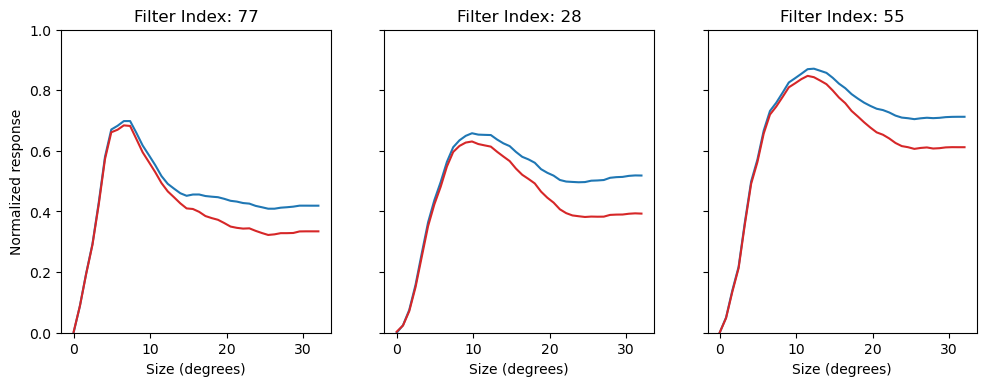

In [ ]:
# plot just filter numbers 77, 28 and 55
fig, ax = plt.subplots(1, 3, figsize=(3*10*cm, 10*cm), sharey=True)
filt_idx = 77
ax[0].plot(2*radii/2.5, np.mean(moving_outputs_norm[filt_idx, contrast_idx, :, :], axis=0), color='tab:blue', label='Moving')
ax[0].plot(2*radii/2.5, np.mean(stationary_outputs_norm[filt_idx, contrast_idx, :, :], axis=0), color='tab:red', label='Stationary')
ax[0].set_title(f'Filter Index: {filt_idx}')
filt_idx = 28
ax[1].plot(2*radii/2.5, np.mean(moving_outputs_norm[filt_idx, contrast_idx, :, :], axis=0), color='tab:blue', label='Moving')
ax[1].plot(2*radii/2.5, np.mean(stationary_outputs_norm[filt_idx, contrast_idx, :, :], axis=0), color='tab:red', label='Stationary')
ax[1].set_title(f'Filter Index: {filt_idx}')
filt_idx = 55
ax[2].plot(2*radii/2.5, np.mean(moving_outputs_norm[filt_idx, contrast_idx, :, :], axis=0), color='tab:blue', label='Moving')
ax[2].plot(2*radii/2.5, np.mean(stationary_outputs_norm[filt_idx, contrast_idx, :, :], axis=0), color='tab:red', label='Stationary')
ax[2].set_title(f'Filter Index: {filt_idx}')
ax[0].set_xlabel('Size (degrees)')
ax[0].set_ylabel('Normalized response')
ax[1].set_xlabel('Size (degrees)')
ax[2].set_xlabel('Size (degrees)')
ax[0].set_ylim(0, 1)
# fig.supxlabel('Radius')
# fig.supylabel('Response')
# fig.suptitle('Average response over windows per filter', fontsize=18)
# save as svg
plt.savefig('../cosyne_2025_figures/network_interaction_response_per_filter_window_avg_best_3_filters.svg', format='svg')

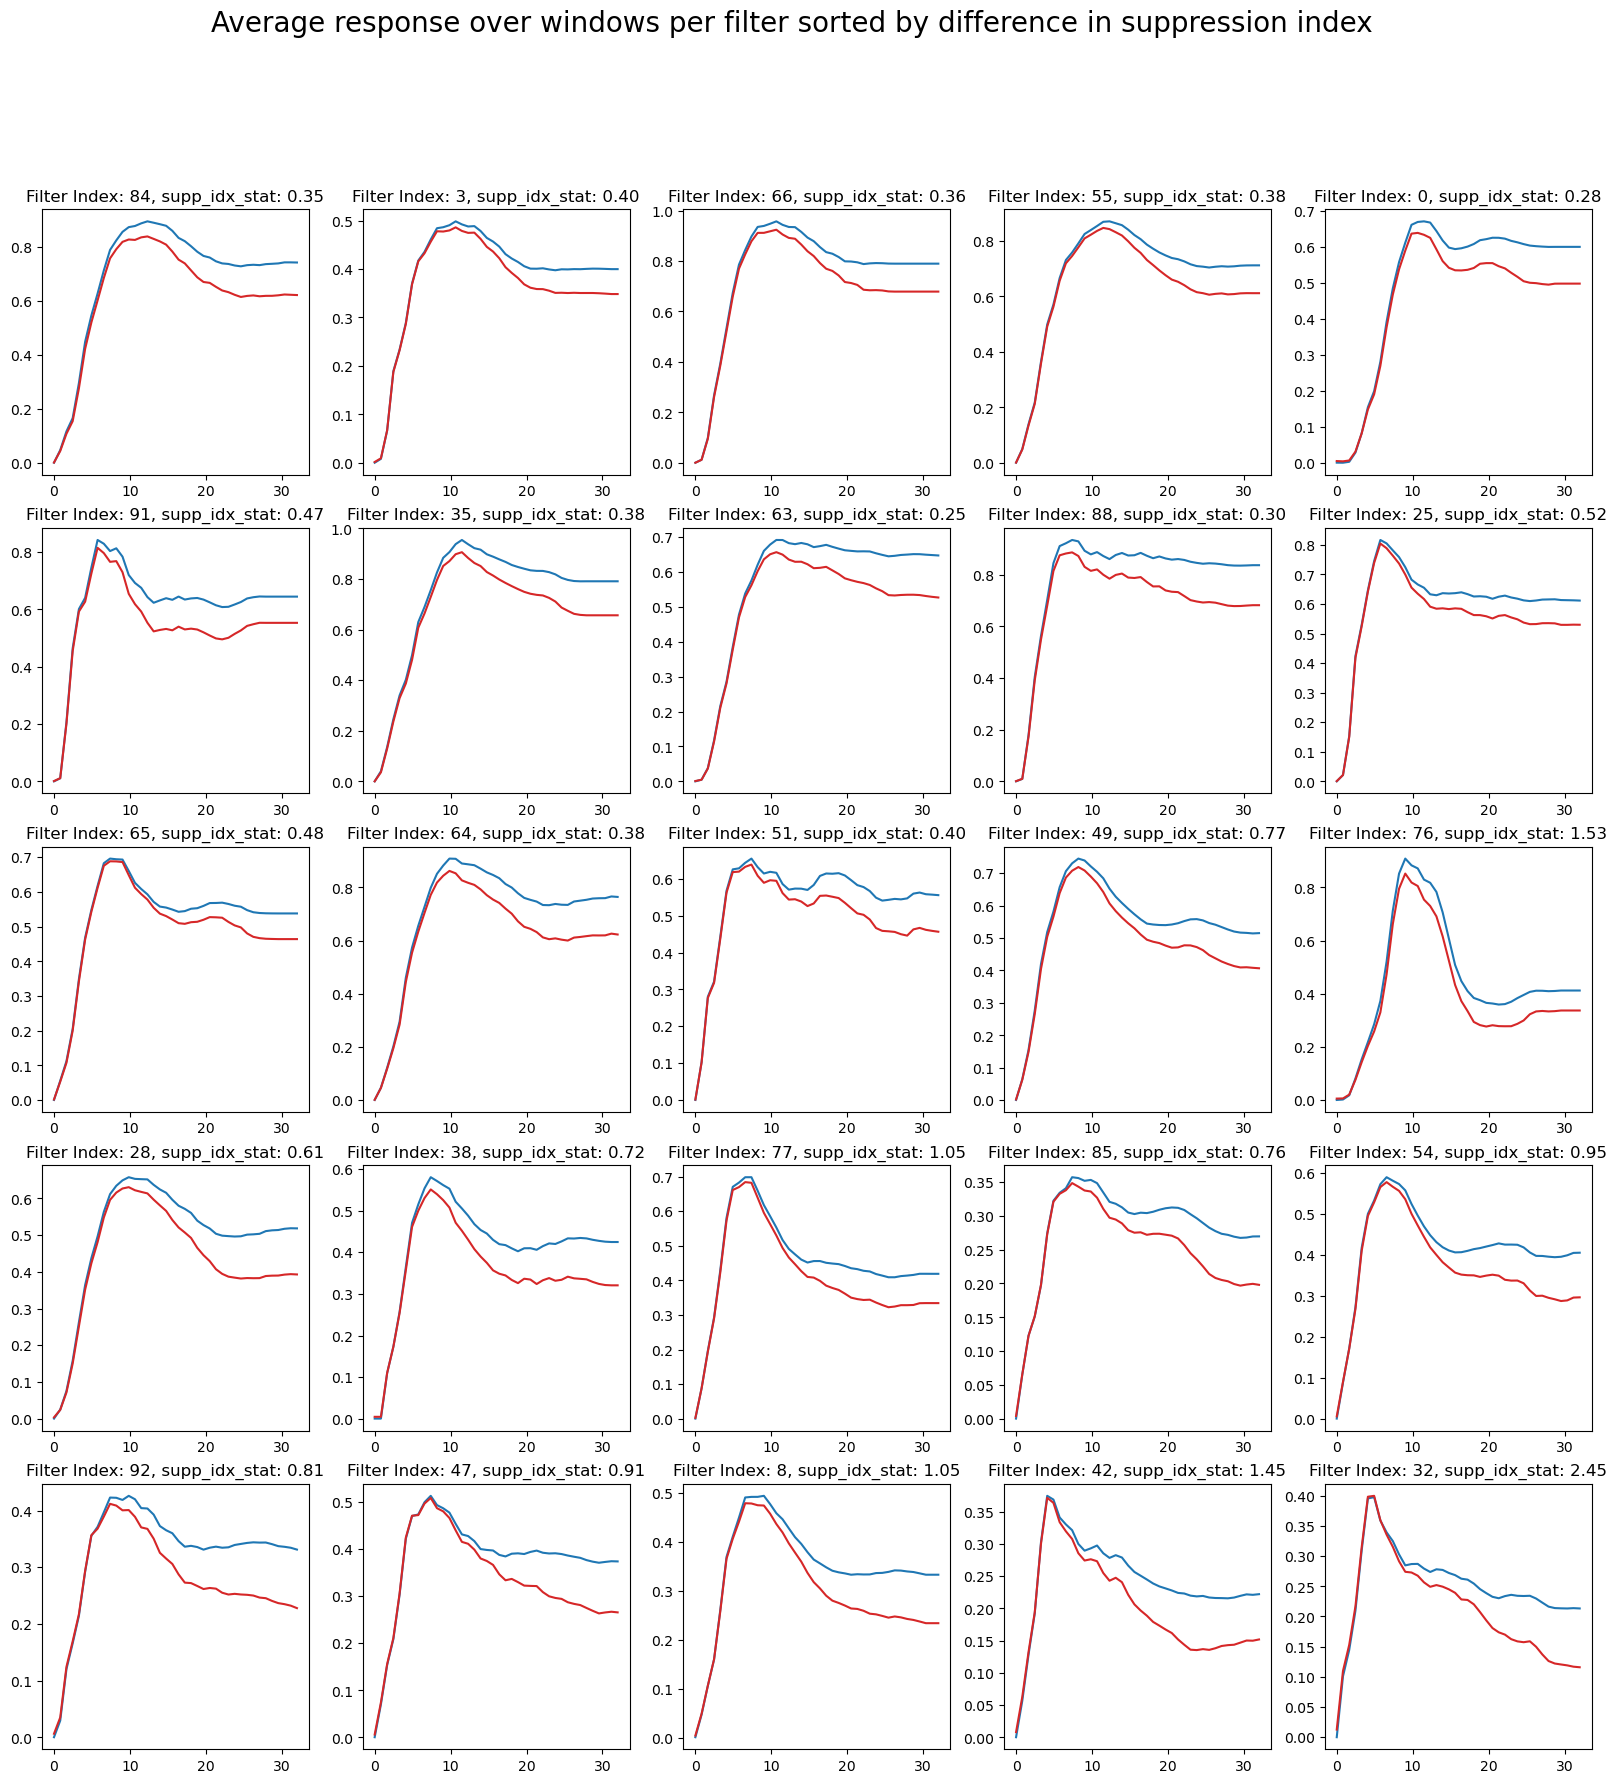

In [ ]:
# redo the plot above but sort by the suppression index during the stationary condition
fig, ax = plt.subplots(5, 5, figsize=(5*4, 5*4))

axes = ax.flatten()
contrast_idx = 2

sorted_indices = np.argsort(supp_idx_stationary_all-supp_idx_moving_all)

sorted_indices[-25:]

for i, filt_idx in enumerate(sorted_indices[-25:]):
    axes[i].plot(2*radii/2.5, np.mean(moving_outputs_norm[filt_idx, contrast_idx, :, :], axis=0), color='tab:blue', label='Moving')
    axes[i].plot(2*radii/2.5, np.mean(stationary_outputs_norm[filt_idx, contrast_idx, :, :], axis=0), color='tab:red', label='Stationary')
    # axes[filt_idx].fill_between(radii, np.mean(moving_outputs[filt_idx, contrast_idx, :, :], axis=0) - np.std(moving_outputs[filt_idx, contrast_idx, :, :], axis=0), np.mean(moving_outputs[filt_idx, contrast_idx, :, :], axis=0) + np.std(moving_outputs[filt_idx, contrast_idx, :, :], axis=0), color='tab:blue', alpha=0.5)
    # axes[filt_idx].fill_between(radii, np.mean(stationary_outputs[filt_idx, contrast_idx, :, :], axis=0) - np.std(stationary_outputs[filt_idx, contrast_idx, :, :], axis=0), np.mean(stationary_outputs[filt_idx, contrast_idx, :, :], axis=0) + np.std(stationary_outputs[filt_idx, contrast_idx, :, :], axis=0), color='tab:red', alpha=0.5)
    axes[i].set_title(f'Filter Index: {filt_idx}, supp_idx_stat: {supp_idx_stationary_all[filt_idx]:.2f}')
# fig.supxlabel('Radius')
# fig.supylabel('Response')
fig.suptitle('Average response over windows per filter sorted by difference in suppression index', fontsize=20)
# save as svg
plt.savefig('../cosyne_2025_figures/network_interaction_response_per_filter_window_avg_sorted.svg', format='svg')

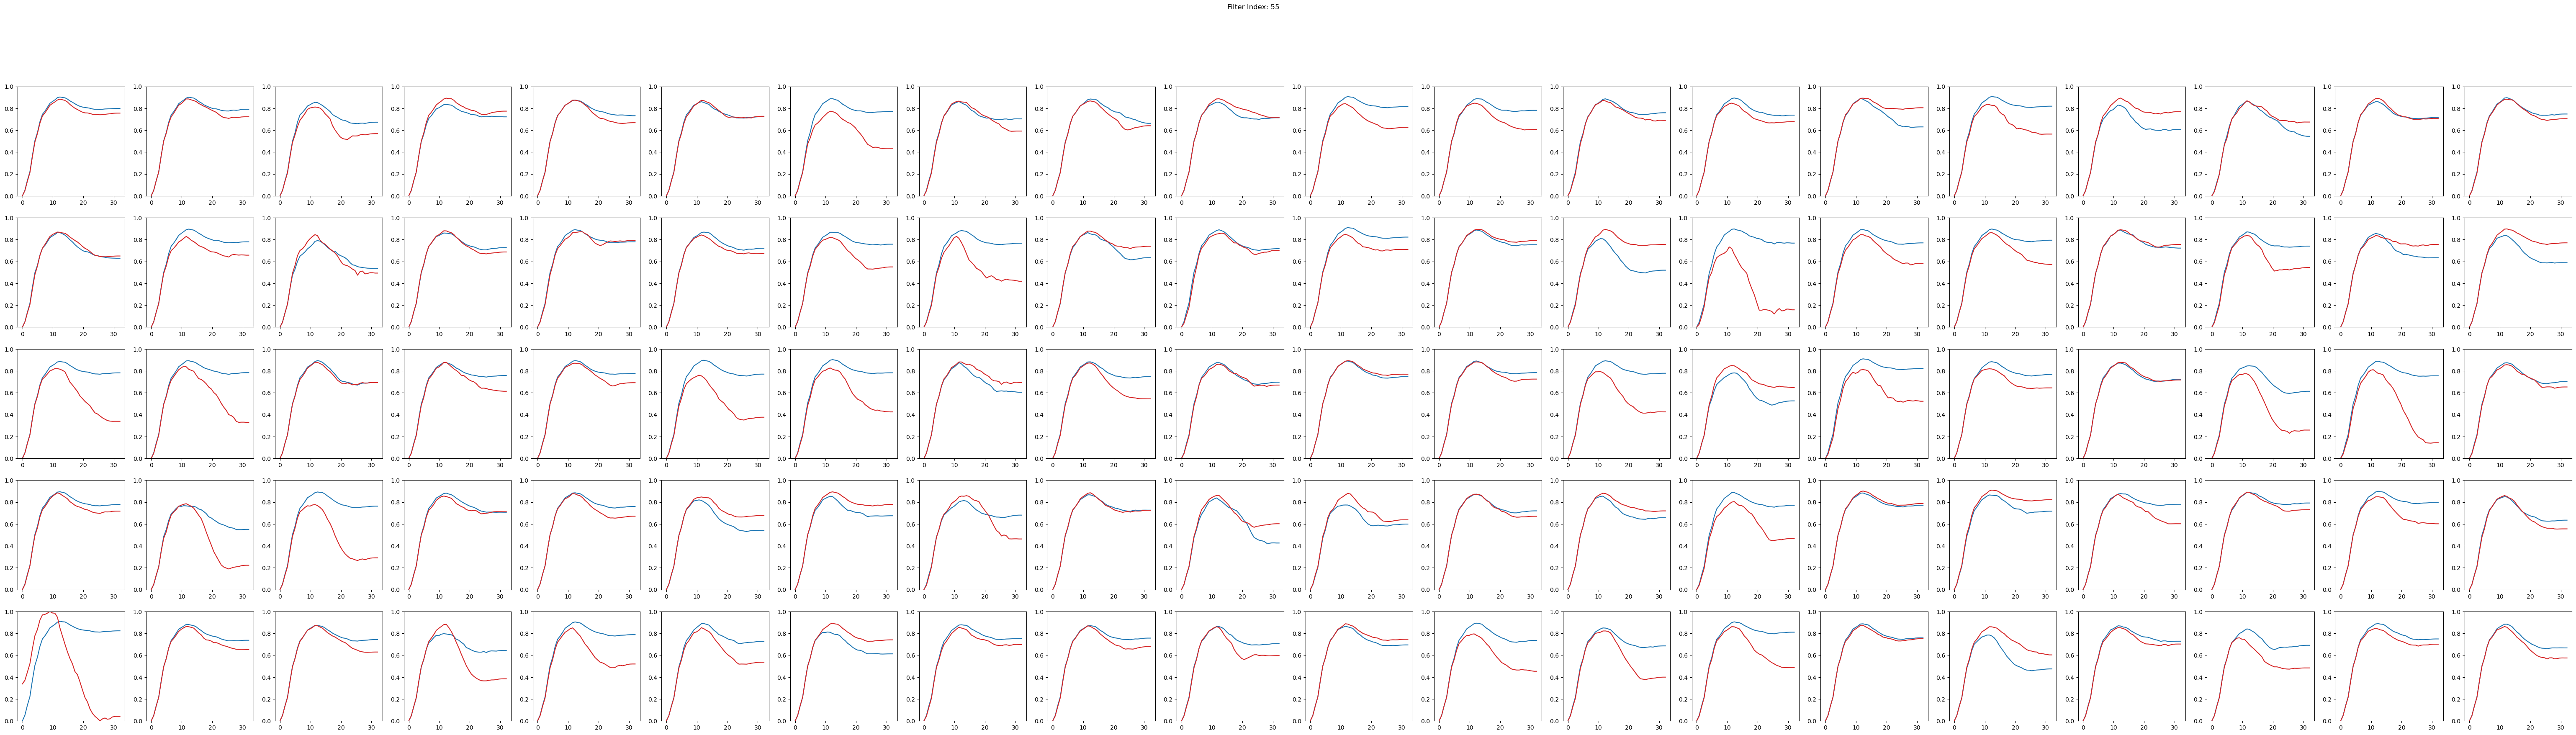

In [ ]:
# plot a 10 by 10 grid with the average over windows for each filter
fig, ax = plt.subplots(5, 20, figsize=(20*10*cm, 5*10*cm))

axes = ax.flatten()
contrast_idx = 2
filt_idx = 55
# 77, 28, 55

# supp_idx_moving_all = np.zeros(100)
# supp_idx_stationary_all = np.zeros(100)

for window_idx in range(100):
    axes[window_idx].plot(2*radii/2.5, moving_outputs_norm[filt_idx, contrast_idx, window_idx, :], color='tab:blue', label='Moving')
    axes[window_idx].plot(2*radii/2.5, stationary_outputs_norm[filt_idx, contrast_idx, window_idx, :], color='tab:red', label='Stationary')
    axes[window_idx].set_ylim(0, 1)
    # axes[filt_idx].fill_between(radii, np.mean(moving_outputs[filt_idx, contrast_idx, :, :], axis=0) - np.std(moving_outputs[filt_idx, contrast_idx, :, :], axis=0), np.mean(moving_outputs[filt_idx, contrast_idx, :, :], axis=0) + np.std(moving_outputs[filt_idx, contrast_idx, :, :], axis=0), color='tab:blue', alpha=0.5)
    # axes[filt_idx].fill_between(radii, np.mean(stationary_outputs[filt_idx, contrast_idx, :, :], axis=0) - np.std(stationary_outputs[filt_idx, contrast_idx, :, :], axis=0), np.mean(stationary_outputs[filt_idx, contrast_idx, :, :], axis=0) + np.std(stationary_outputs[filt_idx, contrast_idx, :, :], axis=0), color='tab:red', alpha=0.5)
    # compute the suppression index
    # supp_idx_moving_all[filt_idx] = (np.max(np.mean(moving_outputs[filt_idx, contrast_idx, :, :], axis=0))-np.mean(moving_outputs[filt_idx, contrast_idx, :, :], axis=0)[-1])/(np.mean(moving_outputs[filt_idx, contrast_idx, :, :], axis=0)[-1])
    # supp_idx_stationary_all[filt_idx] = (np.max(np.mean(stationary_outputs[filt_idx, contrast_idx, :, :], axis=0))-np.mean(stationary_outputs[filt_idx, contrast_idx, :, :], axis=0)[-1])/(np.mean(stationary_outputs[filt_idx, contrast_idx, :, :], axis=0)[-1])
fig.suptitle(f'Filter Index: {filt_idx}')
# fig.supxlabel('Radius')
# fig.supylabel('Response')
# fig.suptitle('Average response over windows per filter', fontsize=20)
# save as svg
plt.savefig(f'../cosyne_2025_figures/network_interaction_response_per_filter_per_window_filt_idx_{filt_idx}.svg', format='svg')

In [ ]:
# print the indices where supp_idx_stationary_all is negative
# if any values are negative set them to nan
print(np.where(supp_idx_stationary_all < 0))
supp_idx_stationary_all[supp_idx_stationary_all <= 0] = np.nan
# do the same for the moving
print(np.where(supp_idx_moving_all < 0))
supp_idx_moving_all[supp_idx_moving_all <= 0] = np.nan
print(np.where(supp_idx_stationary_all > 2))
supp_idx_stationary_all[supp_idx_stationary_all > 2] = np.nan
print(np.where(supp_idx_moving_all > 2))
supp_idx_moving_all[supp_idx_moving_all > 2] = np.nan

# if it is equal to nan in one the arrays set it equal to nan in the other array
for i in range(100):
    if np.isnan(supp_idx_stationary_all[i]):
        supp_idx_moving_all[i] = np.nan
    if np.isnan(supp_idx_moving_all[i]):
        supp_idx_stationary_all[i] = np.nan

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([32]),)
(array([], dtype=int64),)


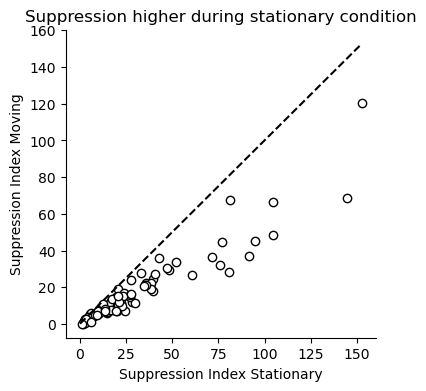

In [ ]:
# scatter plot of suppression indices
fig, ax = plt.subplots(1, 1, figsize=(4,4))
# make the background black and the text white
ax.scatter(supp_idx_stationary_all*100, supp_idx_moving_all*100, color='w', edgecolor='k')
ax.set_xlabel('Suppression Index Stationary')
ax.set_ylabel('Suppression Index Moving')
ax.set_title('Suppression higher during stationary condition')
# plot a line with slope 1 from the min to max of the suppression indices
min_val = np.min([np.nanmin(supp_idx_stationary_all*100), np.nanmin(supp_idx_moving_all*100)])
max_val = np.max([np.nanmax(supp_idx_stationary_all*100), np.nanmax(supp_idx_moving_all*100)])
ax.plot([min_val, max_val], [min_val, max_val], 'k--')
# use log scale
# have no lines on the top and right of the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# save as svg
plt.savefig('../cosyne_2025_figures/network_interaction_suppression_index_scatter.svg', format='svg')

Text(0.5, 0.98, 'Average response over windows per filter at different contrasts stationary condition')

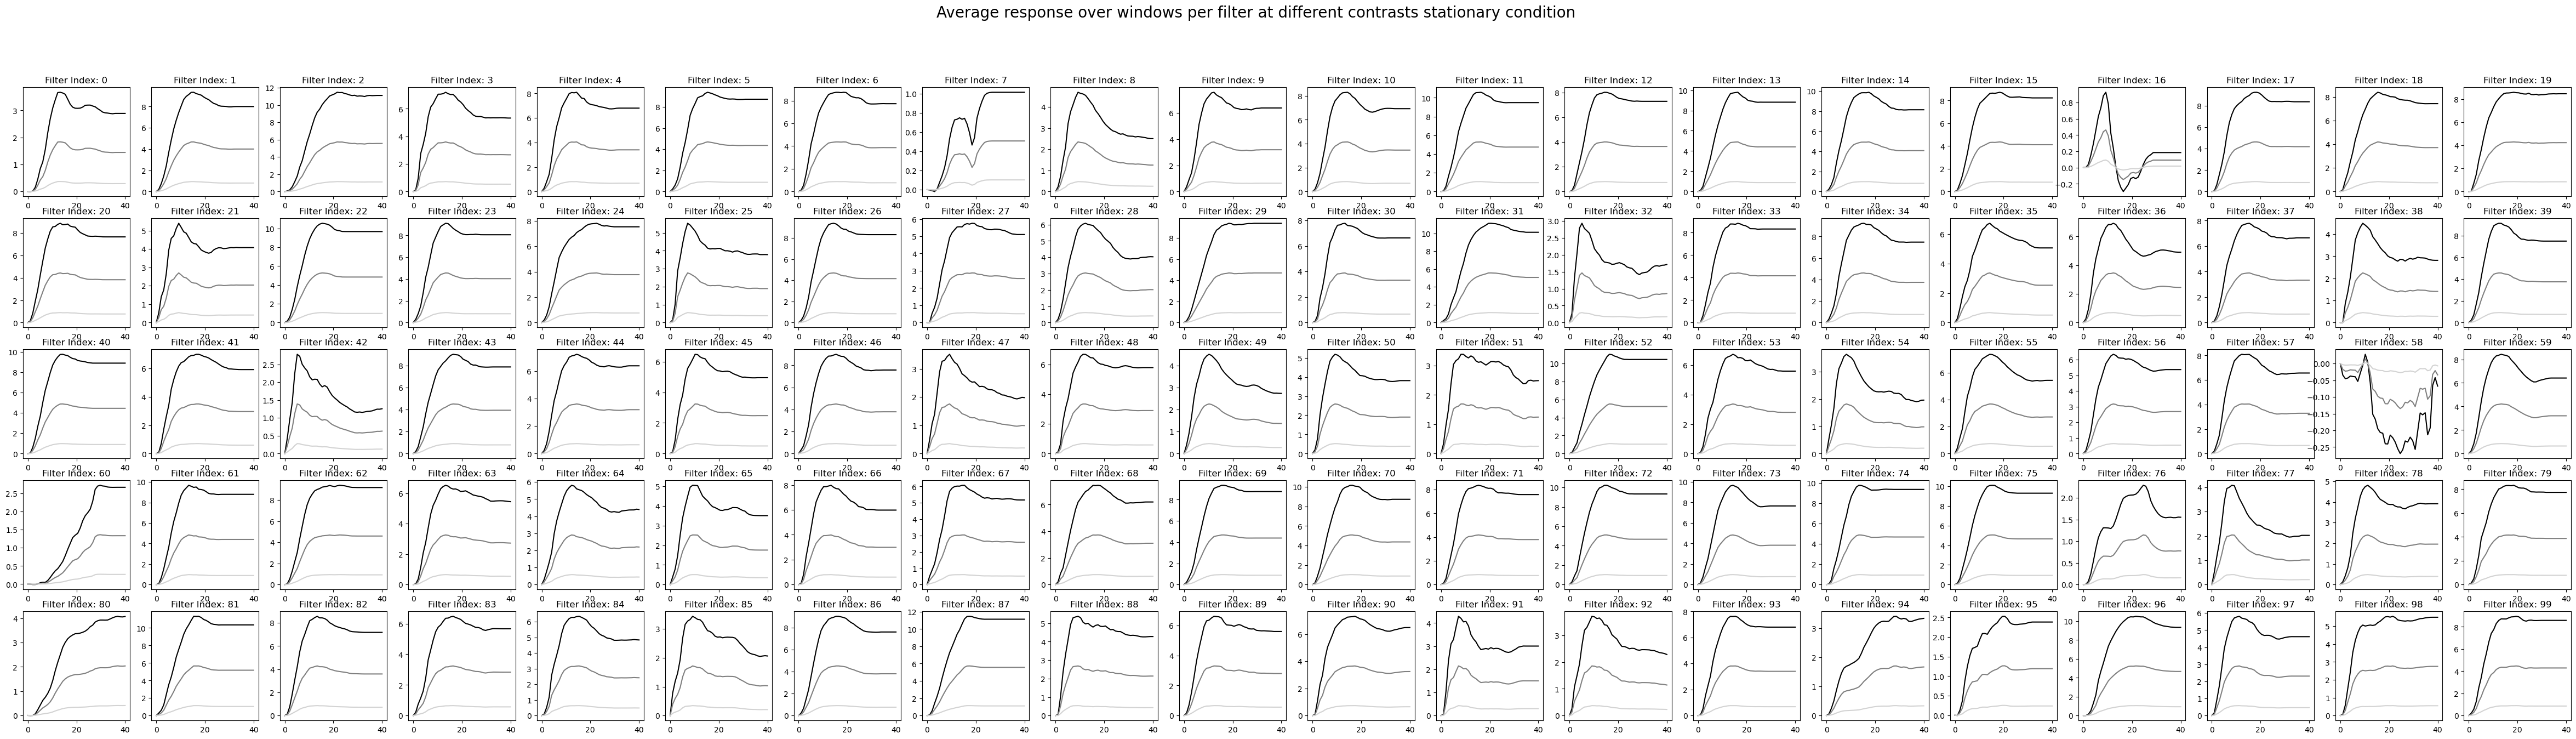

In [ ]:
# plot a 10 by 10 grid with the average over windows for each filter
fig, ax = plt.subplots(5, 20, figsize=(20*3, 5*3))

axes = ax.flatten()

for filt_idx in range(100):
    axes[filt_idx].plot(radii, np.mean(stationary_outputs[filt_idx, 2, :, :], axis=0), color='black', label='High contrast')
    axes[filt_idx].plot(radii, np.mean(stationary_outputs[filt_idx, 1, :, :], axis=0), color='gray', label='Medium contrast')
    axes[filt_idx].plot(radii, np.mean(stationary_outputs[filt_idx, 0, :, :], axis=0), color='lightgray', label='Low contrast')
    # axes[filt_idx].plot(radii, np.mean(stationary_outputs[filt_idx, contrast_idx, :, :], axis=0), color='tab:red', label='Stationary')
    axes[filt_idx].set_title(f'Filter Index: {filt_idx}')
# fig.supxlabel('Radius')
# fig.supylabel('Response')
fig.suptitle('Average response over windows per filter at different contrasts stationary condition', fontsize=20)


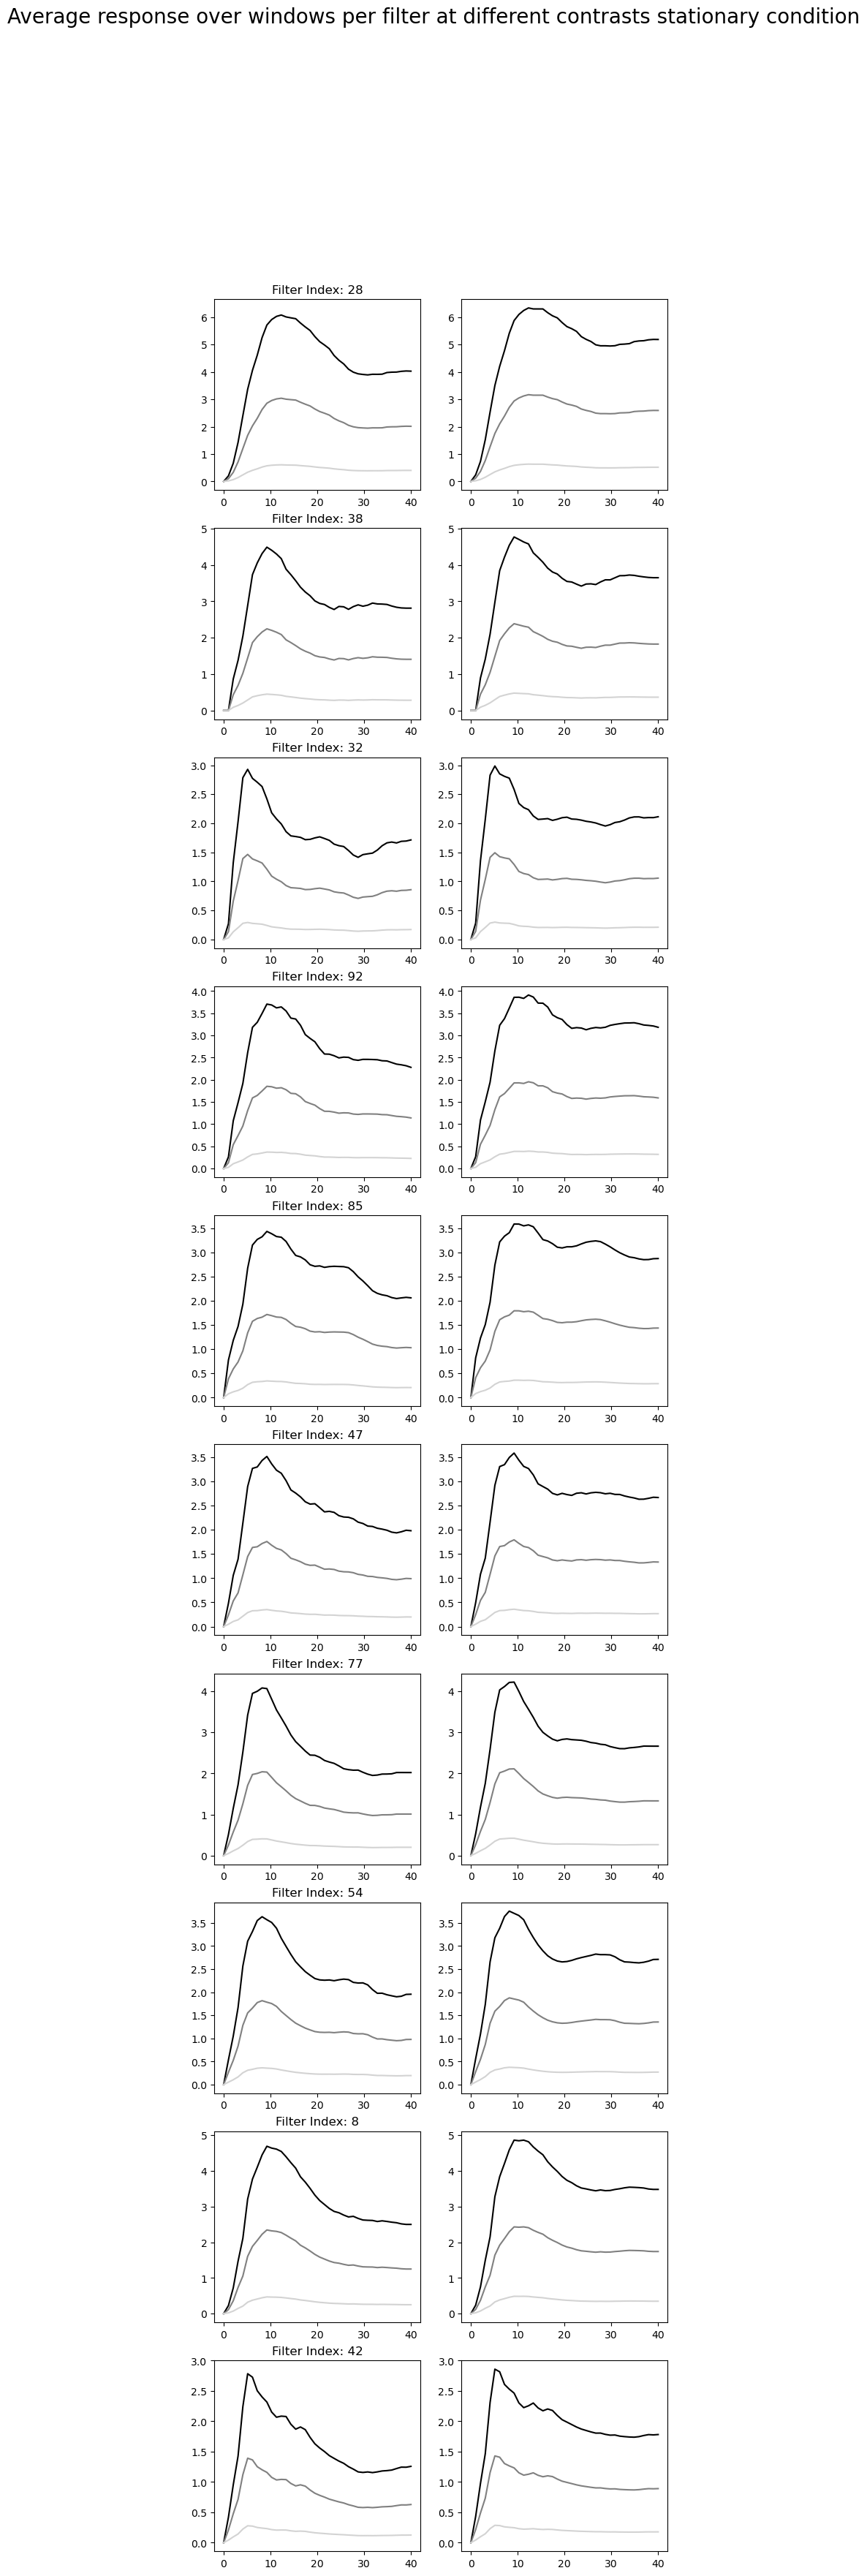

In [ ]:
# plot a 10 by 10 grid with the average over windows for each filter
fig, axes = plt.subplots(10, 2, figsize=(2*4, 10*4))

for i, filt_idx in enumerate(sorted_indices[-14:-4]):
    axes[i, 0].plot(radii, np.mean(stationary_outputs[filt_idx, 2, :, :], axis=0), color='black', label='High contrast')
    axes[i, 0].plot(radii, np.mean(stationary_outputs[filt_idx, 1, :, :], axis=0), color='gray', label='Medium contrast')
    axes[i, 0].plot(radii, np.mean(stationary_outputs[filt_idx, 0, :, :], axis=0), color='lightgray', label='Low contrast')
    axes[i, 1].plot(radii, np.mean(moving_outputs[filt_idx, 2, :, :], axis=0), color='black', label='High contrast')
    axes[i, 1].plot(radii, np.mean(moving_outputs[filt_idx, 1, :, :], axis=0), color='gray', label='Medium contrast')
    axes[i, 1].plot(radii, np.mean(moving_outputs[filt_idx, 0, :, :], axis=0), color='lightgray', label='Low contrast')
    axes[i, 0].set_title(f'Filter Index: {filt_idx}')
    # make the columns share the same axis
    ymax = np.max([axes[i, 0].get_ylim(), axes[i, 1].get_ylim()])
    ymin = np.min([axes[i, 0].get_ylim(), axes[i, 1].get_ylim()])
    axes[i, 0].set_ylim(ymin, ymax)
    axes[i, 1].set_ylim(ymin, ymax)
# fig.supxlabel('Radius')
# fig.supylabel('Response')
fig.suptitle('Average response over windows per filter at different contrasts stationary condition', fontsize=20)
# save as svg
plt.savefig('../cosyne_2025_figures/network_interaction_response_per_filter_contrast_stationary_v_moving.svg', format='svg')

## Split pos and neg

In [ ]:
num_windows = weights_moving_pos.shape[1]

moving_outputs_pos = np.zeros((100, len(contrast_values), num_windows, num_stimuli))
stationary_outputs_pos = np.zeros((100, len(contrast_values), num_windows, num_stimuli))
avg_moving_outputs_pos = np.zeros((100, len(contrast_values), num_stimuli))
avg_stationary_outputs_pos = np.zeros((100, len(contrast_values), num_stimuli))
moving_outputs_neg = np.zeros((100, len(contrast_values), num_windows, num_stimuli))
stationary_outputs_neg = np.zeros((100, len(contrast_values), num_windows, num_stimuli))
avg_moving_outputs_neg = np.zeros((100, len(contrast_values), num_stimuli))
avg_stationary_outputs_neg = np.zeros((100, len(contrast_values), num_stimuli))
lambda_idx = 1
for filt_idx in range(100):
    for i, contrast_val in enumerate(contrast_values):
        ref_filt_output_pos = ic_filt_resp_pos[filt_idx, i, :, filt_idx]
        neighbors_pos = np.delete(ic_filt_resp_pos[:101, i, :, filt_idx], filt_idx, axis=0)
        ref_filt_output_neg = ic_filt_resp_neg[filt_idx, i, :, filt_idx]
        neighbors_neg = np.delete(ic_filt_resp_neg[:101, i, :, filt_idx], filt_idx, axis=0)

        # split into pos and neg and take relu
        ref_filt_output_pos = np.maximum(ref_filt_output_pos, 0)
        ref_filt_output_neg = np.maximum(ref_filt_output_neg, 0)
        neighbors_pos = np.maximum(neighbors_pos, 0)
        neighbors_neg = np.maximum(neighbors_neg, 0)
        # concatenate the neighbors
        neighbors = np.concatenate([neighbors_pos, neighbors_neg], axis=0)

        for window_idx in range(num_windows):
            output_moving_pos = ref_filt_output_pos - weights_moving_pos[filt_idx, window_idx, -1, :, 0] @ neighbors
            output_stationary_pos = ref_filt_output_pos - weights_stationary_pos[filt_idx, window_idx, -1, :, 0] @ neighbors
            moving_outputs_pos[filt_idx, i, window_idx, :] = output_moving_pos
            stationary_outputs_pos[filt_idx, i, window_idx, :] = output_stationary_pos
            output_moving_neg = ref_filt_output_neg - weights_moving_neg[filt_idx, window_idx, -1, :, 0] @ neighbors
            output_stationary_neg = ref_filt_output_neg - weights_stationary_neg[filt_idx, window_idx, -1, :, 0] @ neighbors
            moving_outputs_neg[filt_idx, i, window_idx, :] = output_moving_neg
            stationary_outputs_neg[filt_idx, i, window_idx, :] = output_stationary_neg

        # repeat this using the average weights and offsets
        # compute the average weights and offsets
        avg_weights_moving_pos = np.mean(weights_moving_pos[filt_idx, :, -1, :, 0], axis=0)
        avg_weights_stationary_pos = np.mean(weights_stationary_pos[filt_idx, :, -1, :, 0], axis=0)
        avg_output_moving_pos = ref_filt_output_pos - avg_weights_moving_pos @ neighbors
        avg_output_stationary_pos = ref_filt_output_pos - avg_weights_stationary_pos @ neighbors
        avg_moving_outputs_pos[filt_idx, i, :] = avg_output_moving_pos
        avg_stationary_outputs_pos[filt_idx, i, :] = avg_output_stationary_pos
        avg_weights_moving_neg = np.mean(weights_moving_neg[filt_idx, :, -1, :, 0], axis=0)
        avg_weights_stationary_neg = np.mean(weights_stationary_neg[filt_idx, :, -1, :, 0], axis=0)
        avg_output_moving_neg = ref_filt_output_neg - avg_weights_moving_neg @ neighbors
        avg_output_stationary_neg = ref_filt_output_neg - avg_weights_stationary_neg @ neighbors
        avg_moving_outputs_neg[filt_idx, i, :] = avg_output_moving_neg
        avg_stationary_outputs_neg[filt_idx, i, :] = avg_output_stationary_neg

In [ ]:
moving_outputs_pos.shape

In [ ]:
contrast_idx = 2
# set the figsize to 4 by 3
plt.figure(figsize=(4*1.5, 3*1.5))
plt.plot(radii, np.nanmean(moving_outputs_pos, axis=(0, 2))[contrast_idx, :], color='tab:blue', label='Moving')
plt.plot(radii, np.nanmean(stationary_outputs_pos, axis=(0, 2))[contrast_idx, :], color='tab:red', label='Stationary')
plt.legend()
plt.xlabel('Radius')
plt.ylabel('Response')
plt.title('Population average response')
# compute the suppression index as the peak minus the last value divided by the last value
supp_idx_mov = (np.max(np.nanmean(moving_outputs_pos, axis=(0, 2))[contrast_idx, :])-np.nanmean(moving_outputs_pos, axis=(0, 2))[contrast_idx, -1])/(np.nanmean(moving_outputs_pos, axis=(0, 2))[contrast_idx, -1])
supp_idx_stat = (np.max(np.nanmean(stationary_outputs_pos, axis=(0, 2))[contrast_idx, :])-np.nanmean(stationary_outputs_pos, axis=(0, 2))[contrast_idx, -1])/(np.nanmean(stationary_outputs_pos, axis=(0, 2))[contrast_idx, -1])
# include the suppression index to 2 decimal places as text in the plot
# plt.text(18, 3.5, f'Suppression Index Moving: {supp_idx_mov:.2f}\nSuppression Index Stationary: {supp_idx_stat:.2f}')
plt.show()
plt.clf()

In [ ]:
contrast_idx = 2
# set the figsize to 4 by 3
plt.figure(figsize=(4*1.5, 3*1.5))
plt.plot(radii, np.nanmean(moving_outputs_neg, axis=(0, 2))[contrast_idx, :], color='tab:blue', label='Moving')
plt.plot(radii, np.nanmean(stationary_outputs_neg, axis=(0, 2))[contrast_idx, :], color='tab:red', label='Stationary')
plt.legend()
plt.xlabel('Radius')
plt.ylabel('Response')
plt.title('Population average response')
# compute the suppression index as the peak minus the last value divided by the last value
supp_idx_mov = (np.max(np.nanmean(moving_outputs_neg, axis=(0, 2))[contrast_idx, :])-np.nanmean(moving_outputs_neg, axis=(0, 2))[contrast_idx, -1])/(np.nanmean(moving_outputs_neg, axis=(0, 2))[contrast_idx, -1])
supp_idx_stat = (np.max(np.nanmean(stationary_outputs_neg, axis=(0, 2))[contrast_idx, :])-np.nanmean(stationary_outputs_neg, axis=(0, 2))[contrast_idx, -1])/(np.nanmean(stationary_outputs_neg, axis=(0, 2))[contrast_idx, -1])
# include the suppression index to 2 decimal places as text in the plot
# plt.text(18, 3.5, f'Suppression Index Moving: {supp_idx_mov:.2f}\nSuppression Index Stationary: {supp_idx_stat:.2f}')
plt.show()
plt.clf()

In [ ]:
# plot a 10 by 10 grid with the average over windows for each filter
fig, ax = plt.subplots(5, 20, figsize=(20*3, 5*3))

axes = ax.flatten()
contrast_idx = 2

for filt_idx in range(100):
    axes[filt_idx].plot(radii, np.nanmean(moving_outputs_pos[filt_idx, contrast_idx, :, :], axis=0), color='tab:blue', label='Moving')
    axes[filt_idx].plot(radii, np.nanmean(stationary_outputs_pos[filt_idx, contrast_idx, :, :], axis=0), color='tab:red', label='Stationary')
    # axes[filt_idx].fill_between(radii, np.mean(moving_outputs[filt_idx, contrast_idx, :, :], axis=0) - np.std(moving_outputs[filt_idx, contrast_idx, :, :], axis=0), np.mean(moving_outputs[filt_idx, contrast_idx, :, :], axis=0) + np.std(moving_outputs[filt_idx, contrast_idx, :, :], axis=0), color='tab:blue', alpha=0.5)
    # axes[filt_idx].fill_between(radii, np.mean(stationary_outputs[filt_idx, contrast_idx, :, :], axis=0) - np.std(stationary_outputs[filt_idx, contrast_idx, :, :], axis=0), np.mean(stationary_outputs[filt_idx, contrast_idx, :, :], axis=0) + np.std(stationary_outputs[filt_idx, contrast_idx, :, :], axis=0), color='tab:red', alpha=0.5)
    axes[filt_idx].set_title(f'Filter Index: {filt_idx}')
# fig.supxlabel('Radius')
# fig.supylabel('Response')
fig.suptitle('Average response over windows per filter', fontsize=20)
